<a href="https://colab.research.google.com/github/Jonathan-Aponte/TFM_Pronostico/blob/main/TMF_Pronostico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerias

In [1]:
!pip install darts
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.9/846.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
from itertools import product
from scipy import stats
import re


import darts
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape
from darts.models import RandomForest

# Monta Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Carga de datos

In [3]:
datos_mensuales=pd.read_csv('/content/drive/MyDrive/MES_0423.csv')
datos_poblacion=pd.read_excel('/content/drive/MyDrive/poblacion_1.xlsx')
variables_adicionales=pd.read_excel('/content/drive/MyDrive/Variables.xlsx')


In [4]:
datos_poblacion

Año-Mes  Población total  Población urbana  Población rural
0    2014-01         47830547          27380373         20449174
1    2014-02         47922471          27462604         20459867
2    2014-03         48014395          27544835         20469560
3    2014-04         48106319          27627066         20479253
4    2014-05         48198243          27709297         20488946
..       ...              ...               ...              ...
103  2022-08         56524492          34508916         22015576
104  2022-09         56617416          34591950         22025466
105  2022-10         56710340          34674984         22035356
106  2022-11         56803264          34758018         22045246
107  2022-12         56896188          34841052         22055136

[108 rows x 4 columns]

In [5]:
variables_adicionales

Año-Mes (AAAA-MM)  Indice(IPC)  Tasa de desempleo  Inflacion
0             2022-12       126.03          10.272679      13.12
1             2022-11       124.46           9.500758      12.53
2             2022-10       123.51           9.721030      12.22
3             2022-09       122.63          10.748438      11.44
4             2022-08       121.50          10.631277      10.84
..                ...          ...                ...        ...
103           2014-05        81.53           9.067400       2.93
104           2014-04        81.14           9.308400       2.72
105           2014-03        80.77           9.844500       2.51
106           2014-02        80.45          11.087800       2.32
107           2014-01        79.95          11.532400       2.13

[108 rows x 4 columns]

# Limpieza de datos

## Zona de estudio

In [6]:
pais = ['Colombia']
datos_Colombia = datos_mensuales[datos_mensuales['Country'].isin(pais)]

datos_Colombia.head(10)

Country        Time                     Balance  \
80  Colombia  April 2023                     Remarks   
81  Colombia  April 2023  Net Electricity Production   
82  Colombia  April 2023  Net Electricity Production   
83  Colombia  April 2023  Net Electricity Production   
84  Colombia  April 2023  Net Electricity Production   
85  Colombia  April 2023  Net Electricity Production   
86  Colombia  April 2023  Net Electricity Production   
87  Colombia  April 2023  Net Electricity Production   
88  Colombia  April 2023  Net Electricity Production   
89  Colombia  April 2023  Net Electricity Production   

                              Product      Value Unit  
80   Data is estimated for this month        NaN  GWh  
81                        Electricity  7208.0218  GWh  
82            Total Combustible Fuels  2097.2395  GWh  
83  Coal, Peat and Manufactured Gases   320.5577  GWh  
84         Oil and Petroleum Products   224.2527  GWh  
85                        Natural Gas  1370.9143  GWh  
86             Combustible Renewables   181.5148  GWh  
87                              Hydro  5075.6983  GWh  
88                               Wind    15.2014  GWh  
89                              Solar    19.8826  GWh

##Variable Objetivo

In [7]:
variable_objetivo=['Final Consumption (Calculated)']
datos_Colombia= datos_Colombia[datos_Colombia['Balance'].isin(variable_objetivo)]

datos_Colombia.head(10)

Country            Time                         Balance      Product  \
92    Colombia      April 2023  Final Consumption (Calculated)  Electricity   
905   Colombia      March 2023  Final Consumption (Calculated)  Electricity   
1722  Colombia   February 2023  Final Consumption (Calculated)  Electricity   
2539  Colombia    January 2023  Final Consumption (Calculated)  Electricity   
3355  Colombia   December 2022  Final Consumption (Calculated)  Electricity   
4166  Colombia   November 2022  Final Consumption (Calculated)  Electricity   
4976  Colombia    October 2022  Final Consumption (Calculated)  Electricity   
5789  Colombia  September 2022  Final Consumption (Calculated)  Electricity   
6603  Colombia     August 2022  Final Consumption (Calculated)  Electricity   
7416  Colombia       July 2022  Final Consumption (Calculated)  Electricity   

          Value Unit  
92    6796.9155  GWh  
905   7732.3117  GWh  
1722  7129.8401  GWh  
2539  6751.4144  GWh  
3355  6003.8697  GWh  
4166  6416.2185  GWh  
4976  6581.5879  GWh  
5789  6443.4663  GWh  
6603  6573.8738  GWh  
7416  6541.5512  GWh

In [8]:
# Cambiar los nombres de las columnas a español
nombres_espanol = {
    'Country': 'País',
    'Time': 'Fecha',
    'Balance': 'Tipo',
    'Product': 'Producto',
    'Value': 'Consumo',
    'Unit': 'Unidad'
}

datos_Colombia.rename(columns=nombres_espanol, inplace=True)

# Visualizar el DataFrame resultante
datos_Colombia.head(10)


<ipython-input-8-b2ed63c05f63>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_Colombia.rename(columns=nombres_espanol, inplace=True)


País           Fecha                            Tipo     Producto  \
92    Colombia      April 2023  Final Consumption (Calculated)  Electricity   
905   Colombia      March 2023  Final Consumption (Calculated)  Electricity   
1722  Colombia   February 2023  Final Consumption (Calculated)  Electricity   
2539  Colombia    January 2023  Final Consumption (Calculated)  Electricity   
3355  Colombia   December 2022  Final Consumption (Calculated)  Electricity   
4166  Colombia   November 2022  Final Consumption (Calculated)  Electricity   
4976  Colombia    October 2022  Final Consumption (Calculated)  Electricity   
5789  Colombia  September 2022  Final Consumption (Calculated)  Electricity   
6603  Colombia     August 2022  Final Consumption (Calculated)  Electricity   
7416  Colombia       July 2022  Final Consumption (Calculated)  Electricity   

        Consumo Unidad  
92    6796.9155    GWh  
905   7732.3117    GWh  
1722  7129.8401    GWh  
2539  6751.4144    GWh  
3355  6003.8697    GWh  
4166  6416.2185    GWh  
4976  6581.5879    GWh  
5789  6443.4663    GWh  
6603  6573.8738    GWh  
7416  6541.5512    GWh

In [9]:
datos_Colombia.tail(10)

País           Fecha                            Tipo     Producto  \
91801  Colombia    October 2014  Final Consumption (Calculated)  Electricity   
92510  Colombia  September 2014  Final Consumption (Calculated)  Electricity   
93219  Colombia     August 2014  Final Consumption (Calculated)  Electricity   
93928  Colombia       July 2014  Final Consumption (Calculated)  Electricity   
94637  Colombia       June 2014  Final Consumption (Calculated)  Electricity   
95346  Colombia          may-14  Final Consumption (Calculated)  Electricity   
96055  Colombia      April 2014  Final Consumption (Calculated)  Electricity   
96764  Colombia      March 2014  Final Consumption (Calculated)  Electricity   
97473  Colombia   February 2014  Final Consumption (Calculated)  Electricity   
98182  Colombia    January 2014  Final Consumption (Calculated)  Electricity   

        Consumo Unidad  
91801  5346.948    GWh  
92510  5344.465    GWh  
93219  5396.853    GWh  
93928  5291.915    GWh  
94637  5110.381    GWh  
95346  5110.537    GWh  
96055  5038.419    GWh  
96764  5142.876    GWh  
97473  4884.920    GWh  
98182  5019.684    GWh

In [10]:
print(datos_Colombia.dtypes)

País         object
Fecha        object
Tipo         object
Producto     object
Consumo     float64
Unidad       object
dtype: object


## Unificar formato de fecha

Convertimos la fecha en un formato adecuado para su procesamiento y se establece como indice del conjunto de datos




In [11]:
'''
datos_Colombia['Fecha'] = datos_Colombia['Fecha'].str.replace(r'(may)-(\d{2})', r'May 20\2')
'''

# Reemplazar el formato "may-YY" por "May YYYY" en la columna 'Fecha'
datos_Colombia['Fecha'] = datos_Colombia['Fecha'].str.replace(r'(may)-(\d{2})', r'\1 20\2', regex=True, flags=re.IGNORECASE)

<ipython-input-11-3a947aaabef5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_Colombia['Fecha'] = datos_Colombia['Fecha'].str.replace(r'(may)-(\d{2})', r'\1 20\2', regex=True, flags=re.IGNORECASE)


In [12]:
datos_Colombia.head(10)

País           Fecha                            Tipo     Producto  \
92    Colombia      April 2023  Final Consumption (Calculated)  Electricity   
905   Colombia      March 2023  Final Consumption (Calculated)  Electricity   
1722  Colombia   February 2023  Final Consumption (Calculated)  Electricity   
2539  Colombia    January 2023  Final Consumption (Calculated)  Electricity   
3355  Colombia   December 2022  Final Consumption (Calculated)  Electricity   
4166  Colombia   November 2022  Final Consumption (Calculated)  Electricity   
4976  Colombia    October 2022  Final Consumption (Calculated)  Electricity   
5789  Colombia  September 2022  Final Consumption (Calculated)  Electricity   
6603  Colombia     August 2022  Final Consumption (Calculated)  Electricity   
7416  Colombia       July 2022  Final Consumption (Calculated)  Electricity   

        Consumo Unidad  
92    6796.9155    GWh  
905   7732.3117    GWh  
1722  7129.8401    GWh  
2539  6751.4144    GWh  
3355  6003.8697    GWh  
4166  6416.2185    GWh  
4976  6581.5879    GWh  
5789  6443.4663    GWh  
6603  6573.8738    GWh  
7416  6541.5512    GWh

In [13]:
def convierte_fecha(fecha_str):
    try:
        return pd.to_datetime(fecha_str, format='%B %Y')
    except ValueError as e:
        return f"Error en {fecha_str}: {e}"

# Aplicar la función convierte_fecha a la columna 'Fecha'
datos_Colombia['Fecha'] = datos_Colombia['Fecha'].apply(convierte_fecha)

# Verificar el resultado
print(datos_Colombia['Fecha'])


92      2023-04-01
905     2023-03-01
1722    2023-02-01
2539    2023-01-01
3355    2022-12-01
           ...    
95346   2014-05-01
96055   2014-04-01
96764   2014-03-01
97473   2014-02-01
98182   2014-01-01
Name: Fecha, Length: 112, dtype: datetime64[ns]


<ipython-input-13-4d484c5bb15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_Colombia['Fecha'] = datos_Colombia['Fecha'].apply(convierte_fecha)


## Eliminación de datos incompletos

Se eliminan los datos de consumo de energia del año 2023

In [14]:
datos_Colombia

País      Fecha                            Tipo     Producto  \
92     Colombia 2023-04-01  Final Consumption (Calculated)  Electricity   
905    Colombia 2023-03-01  Final Consumption (Calculated)  Electricity   
1722   Colombia 2023-02-01  Final Consumption (Calculated)  Electricity   
2539   Colombia 2023-01-01  Final Consumption (Calculated)  Electricity   
3355   Colombia 2022-12-01  Final Consumption (Calculated)  Electricity   
...         ...        ...                             ...          ...   
95346  Colombia 2014-05-01  Final Consumption (Calculated)  Electricity   
96055  Colombia 2014-04-01  Final Consumption (Calculated)  Electricity   
96764  Colombia 2014-03-01  Final Consumption (Calculated)  Electricity   
97473  Colombia 2014-02-01  Final Consumption (Calculated)  Electricity   
98182  Colombia 2014-01-01  Final Consumption (Calculated)  Electricity   

         Consumo Unidad  
92     6796.9155    GWh  
905    7732.3117    GWh  
1722   7129.8401    GWh  
2539   6751.4144    GWh  
3355   6003.8697    GWh  
...          ...    ...  
95346  5110.5370    GWh  
96055  5038.4190    GWh  
96764  5142.8760    GWh  
97473  4884.9200    GWh  
98182  5019.6840    GWh  

[112 rows x 6 columns]

Eliminamos los datos parciales para el año 2023

In [15]:
# Filtrar y eliminar las filas correspondientes al año 2023
datos_Colombia = datos_Colombia.loc[datos_Colombia['Fecha'].dt.year != 2023]

datos_Colombia.head(10)

País      Fecha                            Tipo     Producto  \
3355   Colombia 2022-12-01  Final Consumption (Calculated)  Electricity   
4166   Colombia 2022-11-01  Final Consumption (Calculated)  Electricity   
4976   Colombia 2022-10-01  Final Consumption (Calculated)  Electricity   
5789   Colombia 2022-09-01  Final Consumption (Calculated)  Electricity   
6603   Colombia 2022-08-01  Final Consumption (Calculated)  Electricity   
7416   Colombia 2022-07-01  Final Consumption (Calculated)  Electricity   
8230   Colombia 2022-06-01  Final Consumption (Calculated)  Electricity   
9044   Colombia 2022-05-01  Final Consumption (Calculated)  Electricity   
9858   Colombia 2022-04-01  Final Consumption (Calculated)  Electricity   
10672  Colombia 2022-03-01  Final Consumption (Calculated)  Electricity   

         Consumo Unidad  
3355   6003.8697    GWh  
4166   6416.2185    GWh  
4976   6581.5879    GWh  
5789   6443.4663    GWh  
6603   6573.8738    GWh  
7416   6541.5512    GWh  
8230   6258.6438    GWh  
9044   6591.1918    GWh  
9858   6326.0289    GWh  
10672  6571.7830    GWh

In [16]:
# Reiniciar el índice
datos_Colombia.reset_index(drop=True, inplace=True)


In [17]:
# Establecer la columna 'Fecha' como índice
datos_Colombia.set_index('Fecha', inplace=True)

In [18]:
datos_Colombia=datos_Colombia.sort_index()

In [19]:
datos_Colombia.head(10)

País                            Tipo     Producto   Consumo  \
Fecha                                                                         
2014-01-01  Colombia  Final Consumption (Calculated)  Electricity  5019.684   
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   

           Unidad  
Fecha              
2014-01-01    GWh  
2014-02-01    GWh  
2014-03-01    GWh  
2014-04-01    GWh  
2014-05-01    GWh  
2014-06-01    GWh  
2014-07-01    GWh  
2014-08-01    GWh  
2014-09-01    GWh  
2014-10-01    GWh

## Adición de variables exógenas

### Variables de población

In [20]:
datos_poblacion.head(10)

Año-Mes  Población total  Población urbana  Población rural
0  2014-01         47830547          27380373         20449174
1  2014-02         47922471          27462604         20459867
2  2014-03         48014395          27544835         20469560
3  2014-04         48106319          27627066         20479253
4  2014-05         48198243          27709297         20488946
5  2014-06         48290167          27791528         20498639
6  2014-07         48382091          27873760         20508331
7  2014-08         48474015          27955992         20518023
8  2014-09         48565939          28038224         20527715
9  2014-10         48657863          28120456         20537407

In [21]:
# Convertir la columna 'Año-Mes' al formato de fecha
datos_poblacion['Año-Mes'] = pd.to_datetime(datos_poblacion['Año-Mes'])

# Establecer la columna 'Año-Mes' como índice
datos_poblacion.set_index('Año-Mes', inplace=True)

# Imprimir el DataFrame con el índice actualizado
print(datos_poblacion)


            Población total  Población urbana  Población rural
Año-Mes                                                       
2014-01-01         47830547          27380373         20449174
2014-02-01         47922471          27462604         20459867
2014-03-01         48014395          27544835         20469560
2014-04-01         48106319          27627066         20479253
2014-05-01         48198243          27709297         20488946
...                     ...               ...              ...
2022-08-01         56524492          34508916         22015576
2022-09-01         56617416          34591950         22025466
2022-10-01         56710340          34674984         22035356
2022-11-01         56803264          34758018         22045246
2022-12-01         56896188          34841052         22055136

[108 rows x 3 columns]


In [22]:
# Mostrar los tipos de datos de cada columna
print(datos_poblacion.dtypes)


Población total     int64
Población urbana    int64
Población rural     int64
dtype: object


In [23]:
datos_Colombia=pd.concat([datos_Colombia, datos_poblacion], axis=1)
datos_Colombia.head(10)

País                            Tipo     Producto   Consumo  \
2014-01-01  Colombia  Final Consumption (Calculated)  Electricity  5019.684   
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   

           Unidad  Población total  Población urbana  Población rural  
2014-01-01    GWh         47830547          27380373         20449174  
2014-02-01    GWh         47922471          27462604         20459867  
2014-03-01    GWh         48014395          27544835         20469560  
2014-04-01    GWh         48106319          27627066         20479253  
2014-05-01    GWh         48198243          27709297         20488946  
2014-06-01    GWh         48290167          27791528         20498639  
2014-07-01    GWh         48382091          27873760         20508331  
2014-08-01    GWh         48474015          27955992         20518023  
2014-09-01    GWh         48565939          28038224         20527715  
2014-10-01    GWh         48657863          28120456         20537407

### Variables macroeconómicas

In [24]:
variables_adicionales.dtypes

Año-Mes (AAAA-MM)     object
Indice(IPC)          float64
Tasa de desempleo    float64
Inflacion            float64
dtype: object

In [25]:
variables_adicionales['Año-Mes (AAAA-MM)'] = pd.to_datetime(variables_adicionales['Año-Mes (AAAA-MM)'])

# Establece la columna de fecha como el índice del DataFrame
variables_adicionales.set_index('Año-Mes (AAAA-MM)', inplace=True)

# Muestra el DataFrame actualizado
print(variables_adicionales)

                   Indice(IPC)  Tasa de desempleo  Inflacion
Año-Mes (AAAA-MM)                                           
2022-12-01              126.03          10.272679      13.12
2022-11-01              124.46           9.500758      12.53
2022-10-01              123.51           9.721030      12.22
2022-09-01              122.63          10.748438      11.44
2022-08-01              121.50          10.631277      10.84
...                        ...                ...        ...
2014-05-01               81.53           9.067400       2.93
2014-04-01               81.14           9.308400       2.72
2014-03-01               80.77           9.844500       2.51
2014-02-01               80.45          11.087800       2.32
2014-01-01               79.95          11.532400       2.13

[108 rows x 3 columns]


In [26]:
# Realiza una unión en base al índice de ambos DataFrames
datos_Colombia= pd.merge(datos_Colombia, variables_adicionales, left_index=True, right_index=True)


In [27]:
datos_Colombia.columns

Index(['País', 'Tipo', 'Producto', 'Consumo', 'Unidad', 'Población total',
       'Población urbana', 'Población rural', 'Indice(IPC)',
       'Tasa de desempleo', 'Inflacion'],
      dtype='object')

In [28]:
datos_Colombia.head(10)

País                            Tipo     Producto   Consumo  \
2014-01-01  Colombia  Final Consumption (Calculated)  Electricity  5019.684   
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   

           Unidad  Población total  Población urbana  Población rural  \
2014-01-01    GWh         47830547          27380373         20449174   
2014-02-01    GWh         47922471          27462604         20459867   
2014-03-01    GWh         48014395          27544835         20469560   
2014-04-01    GWh         48106319          27627066         20479253   
2014-05-01    GWh         48198243          27709297         20488946   
2014-06-01    GWh         48290167          27791528         20498639   
2014-07-01    GWh         48382091          27873760         20508331   
2014-08-01    GWh         48474015          27955992         20518023   
2014-09-01    GWh         48565939          28038224         20527715   
2014-10-01    GWh         48657863          28120456         20537407   

            Indice(IPC)  Tasa de desempleo  Inflacion  
2014-01-01        79.95            11.5324       2.13  
2014-02-01        80.45            11.0878       2.32  
2014-03-01        80.77             9.8445       2.51  
2014-04-01        81.14             9.3084       2.72  
2014-05-01        81.53             9.0674       2.93  
2014-06-01        81.61             9.4019       2.79  
2014-07-01        81.73             9.6865       2.89  
2014-08-01        81.90             9.1600       3.02  
2014-09-01        82.01             8.6057       2.86  
2014-10-01        82.14             8.0953       3.29

## Procesos de limpieza

### Análisis de datos faltantes

In [29]:
valores_faltantes = datos_Colombia.isnull().sum()
# Imprime los valores faltantes por columna
print(valores_faltantes)

País                 0
Tipo                 0
Producto             0
Consumo              0
Unidad               0
Población total      0
Población urbana     0
Población rural      0
Indice(IPC)          0
Tasa de desempleo    0
Inflacion            0
dtype: int64


### Análisis de datos fuera de rango

Tratamiento de valores atípicos que presenta el conjunto de datos

In [30]:
datos_Colombia['Consumo'].describe()

count     108.000000
mean     5944.192259
std       415.305245
min      4884.920000
25%      5674.665700
50%      5987.096900
75%      6246.227100
max      6806.870200
Name: Consumo, dtype: float64

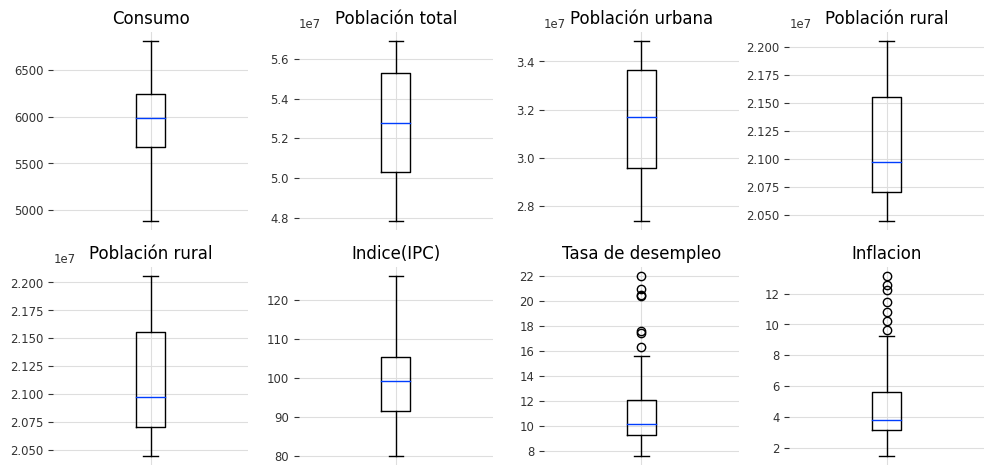

In [31]:
# Crear una figura con 2 filas y 3 columnas de subgráficos
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

# Variables para las columnas que se mostrarán en los diagramas de caja
variables = ['Consumo', 'Población total', 'Población urbana', 'Población rural', 'Indice(IPC)', 'Tasa de desempleo', 'Inflacion']

# Iterar sobre cada eje y cada variable para crear los diagramas de caja
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        variable_index = i * 3 + j
        if variable_index < len(variables):
            ax.boxplot(datos_Colombia[variables[variable_index]])
            ax.set_title(variables[variable_index])
            ax.set_xticklabels([])
            ax.set_xlabel('')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

In [32]:
# Calcular el rango intercuartil (IQR) de la columna 'Tasa de desempleo'
Q1 = datos_Colombia['Tasa de desempleo'].quantile(0.25)
Q3 = datos_Colombia['Tasa de desempleo'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior del rango válido
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores fuera de rango
valores_fuera_de_rango_tasa_desempleo = datos_Colombia[(datos_Colombia['Tasa de desempleo'] < limite_inferior) | (datos_Colombia['Tasa de desempleo'] > limite_superior)]
valores_fuera_de_rango_tasa_desempleo

País                            Tipo     Producto    Consumo  \
2020-04-01  Colombia  Final Consumption (Calculated)  Electricity  5496.8907   
2020-05-01  Colombia  Final Consumption (Calculated)  Electricity  5843.6141   
2020-06-01  Colombia  Final Consumption (Calculated)  Electricity  5759.2574   
2020-07-01  Colombia  Final Consumption (Calculated)  Electricity  6147.8508   
2020-08-01  Colombia  Final Consumption (Calculated)  Electricity  6188.3646   
2020-09-01  Colombia  Final Consumption (Calculated)  Electricity  6069.7887   
2021-01-01  Colombia  Final Consumption (Calculated)  Electricity  6310.9538   

           Unidad  Población total  Población urbana  Población rural  \
2020-04-01    GWh         54957442          33456316         21501126   
2020-05-01    GWh         55050366          33538360         21512006   
2020-06-01    GWh         55143290          33620404         21522886   
2020-07-01    GWh         55236214          33702448         21533766   
2020-08-01    GWh         55329138          33784492         21544646   
2020-09-01    GWh         55422062          33866536         21555526   
2021-01-01    GWh         55156562          33450014         21706548   

            Indice(IPC)  Tasa de desempleo  Inflacion  
2020-04-01       105.70          20.485300       3.51  
2020-05-01       105.36          21.972000       2.85  
2020-06-01       104.97          20.359100       2.19  
2020-07-01       104.97          20.914700       1.97  
2020-08-01       104.96          17.442700       1.88  
2020-09-01       105.29          16.292800       1.97  
2021-01-01       105.91          17.563266       1.60

In [33]:
# Calcular el rango intercuartil (IQR) de la columna 'Tasa de desempleo'
Q1 = datos_Colombia['Inflacion'].quantile(0.25)
Q3 = datos_Colombia['Inflacion'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior del rango válido
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores fuera de rango
valores_fuera_de_rango_inflacion = datos_Colombia[(datos_Colombia['Inflacion'] < limite_inferior) | (datos_Colombia['Inflacion'] > limite_superior)]
valores_fuera_de_rango_inflacion

País                            Tipo     Producto    Consumo  \
2022-06-01  Colombia  Final Consumption (Calculated)  Electricity  6258.6438   
2022-07-01  Colombia  Final Consumption (Calculated)  Electricity  6541.5512   
2022-08-01  Colombia  Final Consumption (Calculated)  Electricity  6573.8738   
2022-09-01  Colombia  Final Consumption (Calculated)  Electricity  6443.4663   
2022-10-01  Colombia  Final Consumption (Calculated)  Electricity  6581.5879   
2022-11-01  Colombia  Final Consumption (Calculated)  Electricity  6416.2185   
2022-12-01  Colombia  Final Consumption (Calculated)  Electricity  6003.8697   

           Unidad  Población total  Población urbana  Población rural  \
2022-06-01    GWh         56338644          34342848         21995796   
2022-07-01    GWh         56431568          34425882         22005686   
2022-08-01    GWh         56524492          34508916         22015576   
2022-09-01    GWh         56617416          34591950         22025466   
2022-10-01    GWh         56710340          34674984         22035356   
2022-11-01    GWh         56803264          34758018         22045246   
2022-12-01    GWh         56896188          34841052         22055136   

            Indice(IPC)  Tasa de desempleo  Inflacion  
2022-06-01       119.31          11.261201       9.67  
2022-07-01       120.27          10.988924      10.21  
2022-08-01       121.50          10.631277      10.84  
2022-09-01       122.63          10.748438      11.44  
2022-10-01       123.51           9.721030      12.22  
2022-11-01       124.46           9.500758      12.53  
2022-12-01       126.03          10.272679      13.12

## Análisis de correlación entre variables

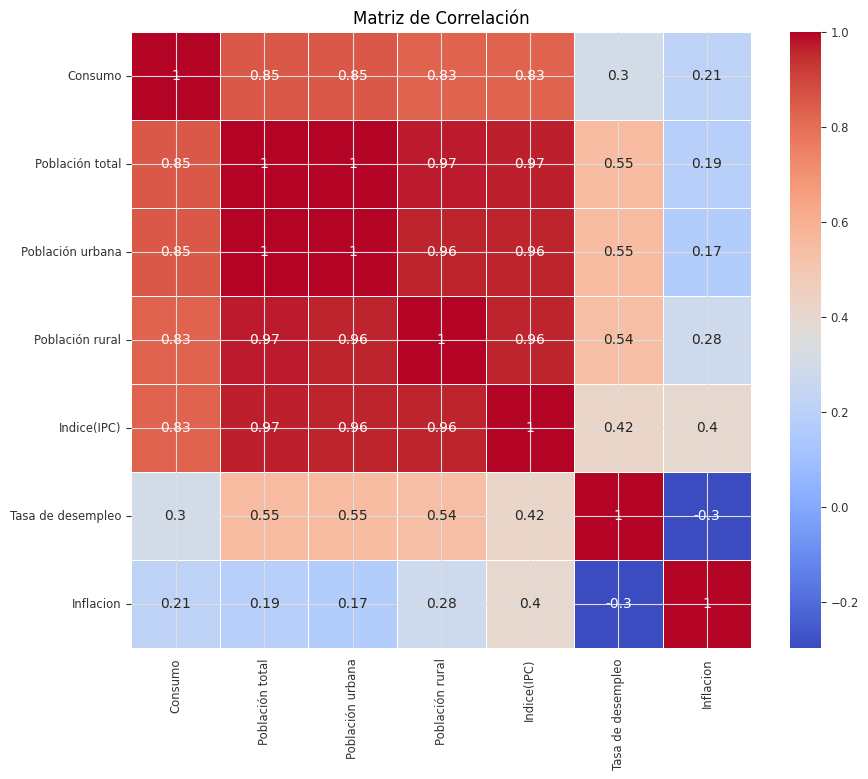

In [34]:
# Calcula la matriz de correlación
correlation_matrix = datos_Colombia[['Consumo', 'Población total', 'Población urbana',	'Población rural',	'Indice(IPC)',	'Tasa de desempleo',	'Inflacion']].corr()

# Crea un heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Personaliza el gráfico (opcional)
plt.title("Matriz de Correlación")
plt.show()


# Conjunto final

In [35]:
datos_Colombia.head(10)

País                            Tipo     Producto   Consumo  \
2014-01-01  Colombia  Final Consumption (Calculated)  Electricity  5019.684   
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   

           Unidad  Población total  Población urbana  Población rural  \
2014-01-01    GWh         47830547          27380373         20449174   
2014-02-01    GWh         47922471          27462604         20459867   
2014-03-01    GWh         48014395          27544835         20469560   
2014-04-01    GWh         48106319          27627066         20479253   
2014-05-01    GWh         48198243          27709297         20488946   
2014-06-01    GWh         48290167          27791528         20498639   
2014-07-01    GWh         48382091          27873760         20508331   
2014-08-01    GWh         48474015          27955992         20518023   
2014-09-01    GWh         48565939          28038224         20527715   
2014-10-01    GWh         48657863          28120456         20537407   

            Indice(IPC)  Tasa de desempleo  Inflacion  
2014-01-01        79.95            11.5324       2.13  
2014-02-01        80.45            11.0878       2.32  
2014-03-01        80.77             9.8445       2.51  
2014-04-01        81.14             9.3084       2.72  
2014-05-01        81.53             9.0674       2.93  
2014-06-01        81.61             9.4019       2.79  
2014-07-01        81.73             9.6865       2.89  
2014-08-01        81.90             9.1600       3.02  
2014-09-01        82.01             8.6057       2.86  
2014-10-01        82.14             8.0953       3.29

# Análisis de tendencia o estacionalidad

Descomponemos la serie temporal para analizar si la serie de datos presenta estacionalidad o tendencia

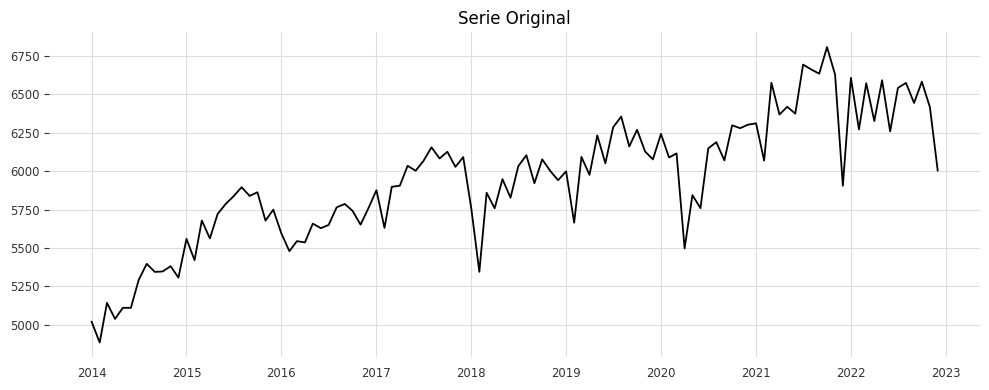

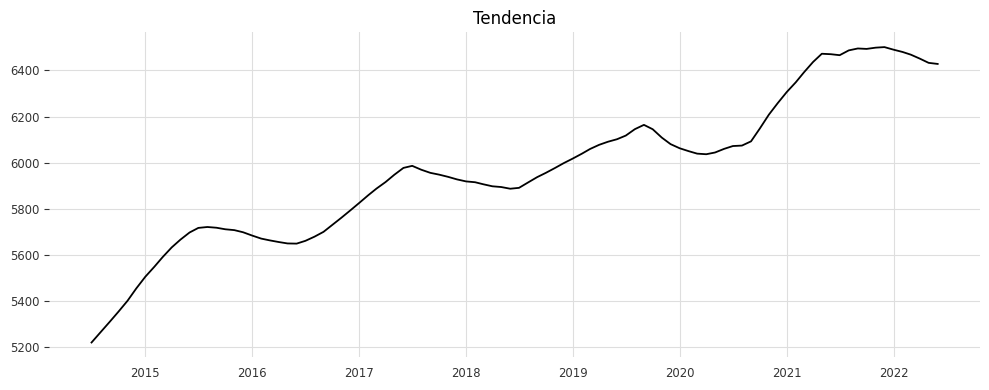

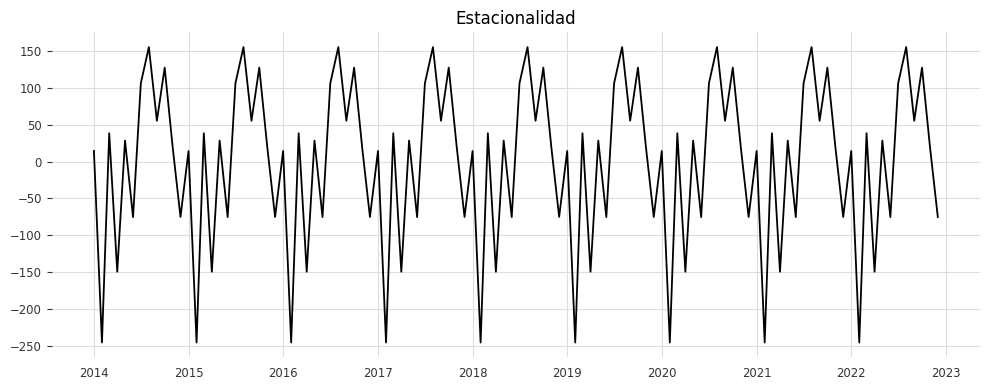

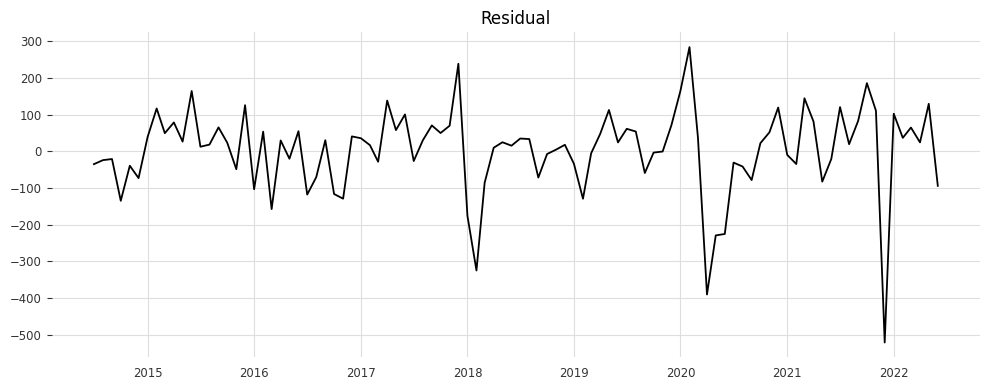

In [36]:
# Realizar la descomposición aditiva o multiplicativa
descomposicion = seasonal_decompose(datos_Colombia['Consumo'], model='additive')  # También puedes usar 'multiplicative'

# Función para visualizar las componentes
def plot_componente(nombre, componente):
    plt.figure(figsize=(10, 4))
    plt.plot(componente)
    plt.title(nombre)
    plt.tight_layout()

# Visualizar las componentes
plot_componente('Serie Original', datos_Colombia['Consumo'])
plot_componente('Tendencia', descomposicion.trend)
plot_componente('Estacionalidad', descomposicion.seasonal)
plot_componente('Residual', descomposicion.resid)

plt.show()

# Prueba de Dickey-Fuller aumentada (ADF)

Mediante este método analizamos si la serie temporal presenta estacionaridad.

In [37]:
def prueba_adf(serie):
    resultado_adf = sm.tsa.adfuller(serie, autolag='AIC')
    print("Resultados de la Prueba de Dickey-Fuller Aumentada:")
    print("Estadística de prueba:", resultado_adf[0])
    print("Valor p:", resultado_adf[1])
    print("Valores críticos:")
    for clave, valor in resultado_adf[4].items():
        print(f"\t{clave}: {valor}")

    if resultado_adf[1] <= 0.05:
        print("Conclusión: La serie de tiempo es estacionaria (rechazamos la hipótesis nula).")
    else:
        print("Conclusión: La serie de tiempo no es estacionaria (no rechazamos la hipótesis nula).")

# Aplicar la prueba ADF a tu serie de tiempo
prueba_adf(datos_Colombia['Consumo'])

Resultados de la Prueba de Dickey-Fuller Aumentada:
Estadística de prueba: -1.6672815410981026
Valor p: 0.44804392153677414
Valores críticos:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226
Conclusión: La serie de tiempo no es estacionaria (no rechazamos la hipótesis nula).


# Conversión a serie estacionaria

Los modelos planteados para la aplicacion de la prediccion requieren una serie temporar con estacionaridad. Para convertir esta serie se a una serie estacional, se aplica la diferencaicion de orden 1 o regular.

In [38]:
# Tu serie de tiempo original
serie_original = datos_Colombia['Consumo']

# Aplicar las 12 primeras diferencias
diferencias = [serie_original.diff(i).dropna() for i in range(1, 13)]

# Realizar la prueba ADF para cada diferencia
for i, diff in enumerate(diferencias):
    result = adfuller(diff, maxlag=12)
    print(f"Diferencia {i+1} (lag=12):")
    print(f"Estadístico ADF: {result[0]}")
    print(f"Valor crítico al 1%: {result[4]['1%']}")
    print(f"Valor crítico al 5%: {result[4]['5%']}")
    print(f"Valor crítico al 10%: {result[4]['10%']}")
    print(f"Valor p: {result[1]}")
    print(f"{'Estacionaria' if result[1] < 0.05 else 'No estacionaria'}\n")



Diferencia 1 (lag=12):
Estadístico ADF: -3.0699761423983927
Valor crítico al 1%: -3.5011373281819504
Valor crítico al 5%: -2.8924800524857854
Valor crítico al 10%: -2.5832749307479226
Valor p: 0.028856359231621265
Estacionaria

Diferencia 2 (lag=12):
Estadístico ADF: -3.0854329385272843
Valor crítico al 1%: -3.5011373281819504
Valor crítico al 5%: -2.8924800524857854
Valor crítico al 10%: -2.5832749307479226
Valor p: 0.02765016714572523
Estacionaria

Diferencia 3 (lag=12):
Estadístico ADF: -3.4449899149838257
Valor crítico al 1%: -3.5019123847798657
Valor crítico al 5%: -2.892815255482889
Valor crítico al 10%: -2.583453861475781
Valor p: 0.009517503765433425
Estacionaria

Diferencia 4 (lag=12):
Estadístico ADF: -3.182011416974324
Valor crítico al 1%: -3.5011373281819504
Valor crítico al 5%: -2.8924800524857854
Valor crítico al 10%: -2.5832749307479226
Valor p: 0.02104982769444154
Estacionaria

Diferencia 5 (lag=12):
Estadístico ADF: -3.581983381547461
Valor crítico al 1%: -3.5051901961

In [39]:
#Aplicar la diferenciación regular (diferencia de orden 1) a la columna 'Consumo'
datos_Colombia['Diferencia'] = datos_Colombia['Consumo'].diff(periods=1)
datos_Colombia_diferencia= datos_Colombia


In [40]:
datos_Colombia_diferencia.head(13)

País                            Tipo     Producto   Consumo  \
2014-01-01  Colombia  Final Consumption (Calculated)  Electricity  5019.684   
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   
2014-11-01  Colombia  Final Consumption (Calculated)  Electricity  5381.362   
2014-12-01  Colombia  Final Consumption (Calculated)  Electricity  5306.939   
2015-01-01  Colombia  Final Consumption (Calculated)  Electricity  5559.489   

           Unidad  Población total  Población urbana  Población rural  \
2014-01-01    GWh         47830547          27380373         20449174   
2014-02-01    GWh         47922471          27462604         20459867   
2014-03-01    GWh         48014395          27544835         20469560   
2014-04-01    GWh         48106319          27627066         20479253   
2014-05-01    GWh         48198243          27709297         20488946   
2014-06-01    GWh         48290167          27791528         20498639   
2014-07-01    GWh         48382091          27873760         20508331   
2014-08-01    GWh         48474015          27955992         20518023   
2014-09-01    GWh         48565939          28038224         20527715   
2014-10-01    GWh         48657863          28120456         20537407   
2014-11-01    GWh         48749787          28202688         20547109   
2014-12-01    GWh         48841711          28284920         20556791   
2015-01-01    GWh         48933635          28367047         20566588   

            Indice(IPC)  Tasa de desempleo  Inflacion  Diferencia  
2014-01-01        79.95            11.5324       2.13         NaN  
2014-02-01        80.45            11.0878       2.32    -134.764  
2014-03-01        80.77             9.8445       2.51     257.956  
2014-04-01        81.14             9.3084       2.72    -104.457  
2014-05-01        81.53             9.0674       2.93      72.118  
2014-06-01        81.61             9.4019       2.79      -0.156  
2014-07-01        81.73             9.6865       2.89     181.534  
2014-08-01        81.90             9.1600       3.02     104.938  
2014-09-01        82.01             8.6057       2.86     -52.388  
2014-10-01        82.14             8.0953       3.29       2.483  
2014-11-01        82.25             8.0622       3.65      34.414  
2014-12-01        82.47             9.0375       3.66     -74.423  
2015-01-01        83.00            11.1517       3.82     252.550

In [41]:
datos_Colombia_diferencia=datos_Colombia_diferencia[1:]
datos_Colombia_diferencia.head(13)

País                            Tipo     Producto   Consumo  \
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   
2014-07-01  Colombia  Final Consumption (Calculated)  Electricity  5291.915   
2014-08-01  Colombia  Final Consumption (Calculated)  Electricity  5396.853   
2014-09-01  Colombia  Final Consumption (Calculated)  Electricity  5344.465   
2014-10-01  Colombia  Final Consumption (Calculated)  Electricity  5346.948   
2014-11-01  Colombia  Final Consumption (Calculated)  Electricity  5381.362   
2014-12-01  Colombia  Final Consumption (Calculated)  Electricity  5306.939   
2015-01-01  Colombia  Final Consumption (Calculated)  Electricity  5559.489   
2015-02-01  Colombia  Final Consumption (Calculated)  Electricity  5420.538   

           Unidad  Población total  Población urbana  Población rural  \
2014-02-01    GWh         47922471          27462604         20459867   
2014-03-01    GWh         48014395          27544835         20469560   
2014-04-01    GWh         48106319          27627066         20479253   
2014-05-01    GWh         48198243          27709297         20488946   
2014-06-01    GWh         48290167          27791528         20498639   
2014-07-01    GWh         48382091          27873760         20508331   
2014-08-01    GWh         48474015          27955992         20518023   
2014-09-01    GWh         48565939          28038224         20527715   
2014-10-01    GWh         48657863          28120456         20537407   
2014-11-01    GWh         48749787          28202688         20547109   
2014-12-01    GWh         48841711          28284920         20556791   
2015-01-01    GWh         48933635          28367047         20566588   
2015-02-01    GWh         49025559          28449179         20576380   

            Indice(IPC)  Tasa de desempleo  Inflacion  Diferencia  
2014-02-01        80.45            11.0878       2.32    -134.764  
2014-03-01        80.77             9.8445       2.51     257.956  
2014-04-01        81.14             9.3084       2.72    -104.457  
2014-05-01        81.53             9.0674       2.93      72.118  
2014-06-01        81.61             9.4019       2.79      -0.156  
2014-07-01        81.73             9.6865       2.89     181.534  
2014-08-01        81.90             9.1600       3.02     104.938  
2014-09-01        82.01             8.6057       2.86     -52.388  
2014-10-01        82.14             8.0953       3.29       2.483  
2014-11-01        82.25             8.0622       3.65      34.414  
2014-12-01        82.47             9.0375       3.66     -74.423  
2015-01-01        83.00            11.1517       3.82     252.550  
2015-02-01        83.96            10.2276       4.36    -138.951

In [42]:
# Aplicar la prueba ADF a tu serie de tiempo
prueba_adf(datos_Colombia_diferencia['Diferencia'])

Resultados de la Prueba de Dickey-Fuller Aumentada:
Estadística de prueba: -3.0699761423983927
Valor p: 0.028856359231621265
Valores críticos:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226
Conclusión: La serie de tiempo es estacionaria (rechazamos la hipótesis nula).


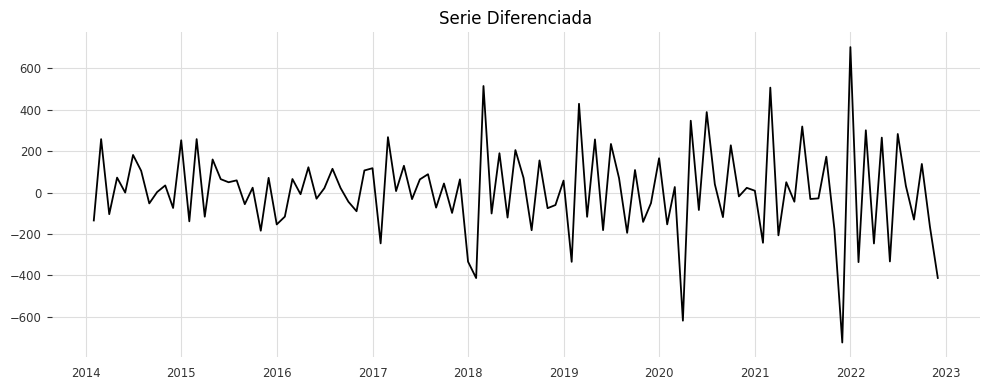

In [43]:
plot_componente('Serie Diferenciada', datos_Colombia_diferencia['Diferencia'])

# División del conjunto de datos en datos de entrenamiento y prueba

El conjunto de datos de la serie temporal consta de 96 datos. Se utilizará el 70% de los datos para entrenar el modelo y el 30% para las pruebas.

In [44]:
#cantidad de datos para aplicar en el modelo
print(len(datos_Colombia_diferencia['Consumo']))

107


In [45]:
# Calcula el índice que separa los datos de entrenamiento y prueba
indice_separacion = int(len(datos_Colombia_diferencia) * 0.7)

# Divide los datos en entrenamiento y prueba
datos_entrenamiento = datos_Colombia_diferencia.iloc[:indice_separacion]
datos_prueba = datos_Colombia_diferencia.iloc[indice_separacion:]


In [46]:
datos_entrenamiento.head()

País                            Tipo     Producto   Consumo  \
2014-02-01  Colombia  Final Consumption (Calculated)  Electricity  4884.920   
2014-03-01  Colombia  Final Consumption (Calculated)  Electricity  5142.876   
2014-04-01  Colombia  Final Consumption (Calculated)  Electricity  5038.419   
2014-05-01  Colombia  Final Consumption (Calculated)  Electricity  5110.537   
2014-06-01  Colombia  Final Consumption (Calculated)  Electricity  5110.381   

           Unidad  Población total  Población urbana  Población rural  \
2014-02-01    GWh         47922471          27462604         20459867   
2014-03-01    GWh         48014395          27544835         20469560   
2014-04-01    GWh         48106319          27627066         20479253   
2014-05-01    GWh         48198243          27709297         20488946   
2014-06-01    GWh         48290167          27791528         20498639   

            Indice(IPC)  Tasa de desempleo  Inflacion  Diferencia  
2014-02-01        80.45            11.0878       2.32    -134.764  
2014-03-01        80.77             9.8445       2.51     257.956  
2014-04-01        81.14             9.3084       2.72    -104.457  
2014-05-01        81.53             9.0674       2.93      72.118  
2014-06-01        81.61             9.4019       2.79      -0.156

In [47]:
datos_prueba.head()

País                            Tipo     Producto    Consumo  \
2020-04-01  Colombia  Final Consumption (Calculated)  Electricity  5496.8907   
2020-05-01  Colombia  Final Consumption (Calculated)  Electricity  5843.6141   
2020-06-01  Colombia  Final Consumption (Calculated)  Electricity  5759.2574   
2020-07-01  Colombia  Final Consumption (Calculated)  Electricity  6147.8508   
2020-08-01  Colombia  Final Consumption (Calculated)  Electricity  6188.3646   

           Unidad  Población total  Población urbana  Población rural  \
2020-04-01    GWh         54957442          33456316         21501126   
2020-05-01    GWh         55050366          33538360         21512006   
2020-06-01    GWh         55143290          33620404         21522886   
2020-07-01    GWh         55236214          33702448         21533766   
2020-08-01    GWh         55329138          33784492         21544646   

            Indice(IPC)  Tasa de desempleo  Inflacion  Diferencia  
2020-04-01       105.70            20.4853       3.51   -618.4689  
2020-05-01       105.36            21.9720       2.85    346.7234  
2020-06-01       104.97            20.3591       2.19    -84.3567  
2020-07-01       104.97            20.9147       1.97    388.5934  
2020-08-01       104.96            17.4427       1.88     40.5138

# Modelo ARIMA

## Parámetros adecuados para el modelo

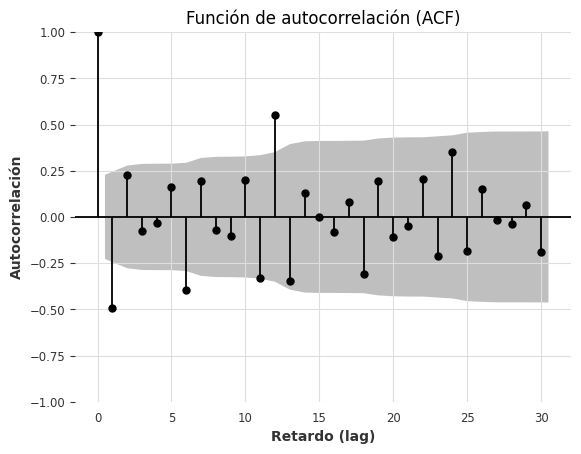

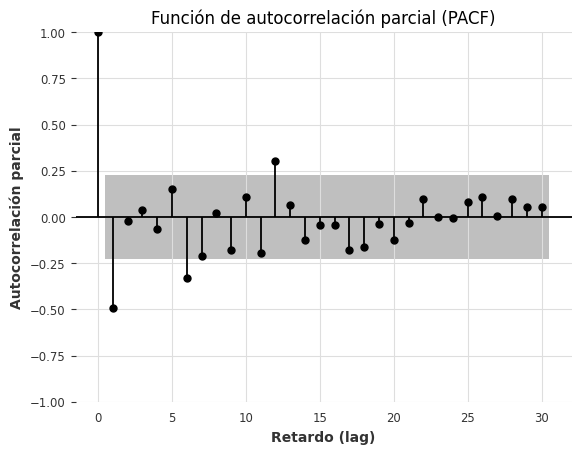

In [48]:
# Calcular y graficar la función de autocorrelación (ACF) de la serie diferenciada
plot_acf(datos_entrenamiento['Diferencia'], lags=30)
plt.xlabel('Retardo (lag)')
plt.ylabel('Autocorrelación')
plt.title('Función de autocorrelación (ACF)')
plt.show()

# Calcular y graficar la función de autocorrelación parcial (PACF) de la serie diferenciada
plot_pacf(datos_entrenamiento['Diferencia'], lags=30)
plt.xlabel('Retardo (lag)')
plt.ylabel('Autocorrelación parcial')
plt.title('Función de autocorrelación parcial (PACF)')
plt.show()


Parametro q (ACF) =4

Parametro p (PACF) = 4

Parametro d= 1, ya que se realizo una diferenciacion estacional de orden 1

## Ajuste del modelo ARIMA

In [49]:
# Ajustar el modelo ARIMA con los valores de p, d, y q
modelo_arima = sm.tsa.ARIMA(datos_entrenamiento['Consumo'], order=(4, 1, 4))
resultado_arima = modelo_arima.fit()

# Imprimir el resumen del modelo ARIMA
print(resultado_arima.summary())


                               SARIMAX Results                                
Dep. Variable:                Consumo   No. Observations:                   74
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -459.577
Date:                Sun, 14 Apr 2024   AIC                            937.154
Time:                        21:43:49   BIC                            957.769
Sample:                    02-01-2014   HQIC                           945.369
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6597      0.257     -2.571      0.010      -1.163      -0.157
ar.L2          0.0338      0.362      0.093      0.926      -0.676       0.744
ar.L3         -0.0876      0.378     -0.232      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Pronósticos con el modelo

In [50]:
len(datos_prueba)

33

In [51]:
# Realizar pronósticos para un período futuro específico
pronosticos = resultado_arima.forecast(steps=len(datos_prueba))

Modelo_Arima = datos_prueba.assign(Consumo_pronostico=pronosticos)
Modelo_Arima=Modelo_Arima[['Consumo', 'Consumo_pronostico']]
print(Modelo_Arima)

              Consumo  Consumo_pronostico
2020-04-01  5496.8907         5997.820633
2020-05-01  5843.6141         6093.681216
2020-06-01  5759.2574         6123.894353
2020-07-01  6147.8508         5996.315711
2020-08-01  6188.3646         6142.520327
2020-09-01  6069.7887         5982.500639
2020-10-01  6297.9615         6086.335089
2020-11-01  6279.3334         6074.969857
2020-12-01  6302.1491         6013.644831
2021-01-01  6310.9538         6139.126722
2021-02-01  6068.3882         5993.947936
2021-03-01  6574.9793         6106.044321
2021-04-01  6368.4120         6052.417290
2021-05-01  6418.2650         6030.190193
2021-06-01  6374.0752         6118.963347
2021-07-01  6693.0381         5998.144120
2021-08-01  6661.8910         6114.464917
2021-09-01  6633.7446         6038.998582
2021-10-01  6806.8702         6050.867417
2021-11-01  6628.7056         6101.653603
2021-12-01  5904.7160         6006.464091
2022-01-01  6606.9853         6114.505336
2022-02-01  6271.1645         6028

## Evaluación del modelo

Evaluación del modelo usando el error cuadrático medio (MSE)

In [52]:
# Calcular los errores entre los pronósticos y los valores reales
errores = Modelo_Arima['Consumo_pronostico'] - Modelo_Arima['Consumo']

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
print("MSE:", mse)


MSE: 158544.47202398078


In [53]:
errores_absolutos = np.abs(Modelo_Arima['Consumo_pronostico'] - Modelo_Arima['Consumo'])

# Calcula el porcentaje de error absoluto para cada punto de datos
porcentajes_error_absoluto = (errores_absolutos / Modelo_Arima['Consumo_pronostico']) * 100

# Calcula el MAPE como el promedio de los porcentajes de error absoluto
mape = np.mean(porcentajes_error_absoluto)

# Imprime el MAPE
print("MAPE:", mape)

MAPE: 5.734914824531161


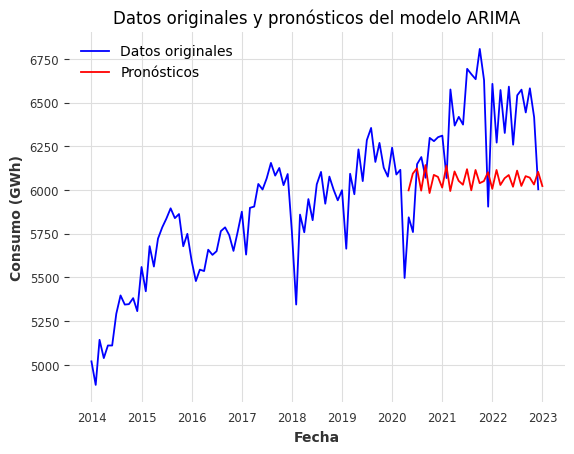

In [54]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_entrenamiento.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=fecha_inicial_pronostico, periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
pronosticos.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(pronosticos.index, pronosticos, label='Pronósticos', color='red')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo ARIMA')
plt.legend()
plt.show()


# Modelo AutoARIMA

In [55]:
# Buscar los hiperparámetros óptimos utilizando AutoARIMA
modelo_autoarima = auto_arima(datos_entrenamiento['Consumo'],seasonal=True,stationary=False, max_p=50, max_d=50, max_q=50, m=12, trace=True, maxiter=5)

# Ajustar el modelo AutoARIMA a los datos de entrenamiento
modelo_autoarima.fit(datos_entrenamiento['Consumo'])

# Obtener los pronósticos del modelo AutoARIMA
pronosticos_autoarima = modelo_autoarima.predict(n_periods=len(datos_prueba))

# Imprimir el modelo AutoARIMA seleccionado
print("Modelo AutoARIMA:", modelo_autoarima.summary())

# Imprimir los pronósticos generados por el modelo AutoARIMA
print("Pronósticos AutoARIMA:", pronosticos_autoarima)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=936.196, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=955.702, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=924.153, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=932.942, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=954.470, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=939.530, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=925.545, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=927.214, Time=0.31 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=928.812, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=934.648, Time=0.57 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=935.790, Time=0.16 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=926.445, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=926.925, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=929.288, Time=0.16 sec
 ARIMA(2,1,1)(1,0,0)[12] intercep

In [56]:
type(pronosticos_autoarima)

# Obtener el índice
indice = pronosticos_autoarima.index

print(indice)

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')


Evaluacion del modelo usando el error cuadratico medio MSE

## MSE

In [57]:
# Calcular los errores entre los pronósticos y los valores reales
errores = pronosticos_autoarima - datos_prueba['Consumo']

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
print("MSE:", mse)


MSE: 91215.25997676974


## MAPE

In [58]:
errores_absolutos = np.abs(pronosticos_autoarima - datos_prueba['Consumo'])

# Calcula el porcentaje de error absoluto para cada punto de datos
porcentajes_error_absoluto = (errores_absolutos / pronosticos_autoarima) * 100

# Calcula el MAPE como el promedio de los porcentajes de error absoluto
mape = np.mean(porcentajes_error_absoluto)

# Imprime el MAPE
print("MAPE:", mape)


MAPE: 4.199708315079493


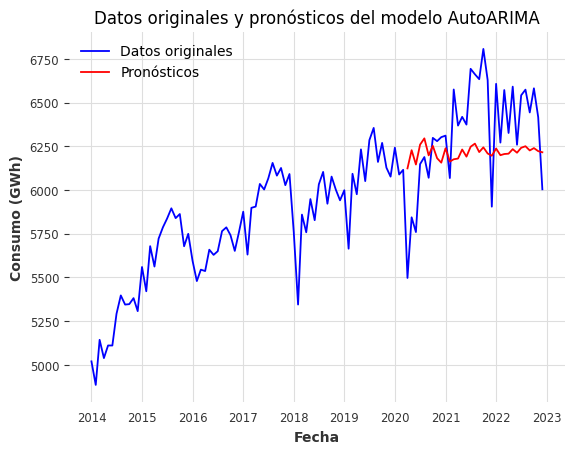

In [59]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_Colombia_diferencia.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=pronosticos_autoarima.index[0], periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
pronosticos.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(pronosticos_autoarima.index, pronosticos_autoarima, label='Pronósticos', color='red')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo AutoARIMA')
plt.legend()
plt.show()

## AutoArima con variables exógenas


In [60]:
modelo_exogenas= auto_arima(datos_entrenamiento['Consumo'], exogenous=datos_entrenamiento[['Población total', 'Indice(IPC)','Tasa de desempleo', 'Inflacion']],
                    seasonal=True, m=12,  # Si tus datos son mensuales
                    trace=True)  # Esto mostrará el progreso del ajuste del modelo

# Resumen del modelo
print(modelo_exogenas.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=955.702, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=920.380, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=930.555, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=954.470, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=939.505, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=921.144, Time=1.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=920.898, Time=1.24 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=927.416, Time=0.39 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=928.005, Time=0.54 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=922.324, Time=1.37 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=922.321, Time=1.60 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=922.010, Time=0.63 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AI

In [61]:
predicciones_exogenas = modelo_exogenas.predict(n_periods=len(datos_prueba), exogenous=datos_prueba[['Población total', 'Indice(IPC)','Tasa de desempleo', 'Inflacion']])
predicciones_exogenas

2020-04-01    6124.211841
2020-05-01    6235.561331
2020-06-01    6147.891619
2020-07-01    6269.571127
2020-08-01    6307.748272
2020-09-01    6203.844649
2020-10-01    6261.877275
2020-11-01    6186.460747
2020-12-01    6159.271173
2021-01-01    6247.399926
2021-02-01    6165.703221
2021-03-01    6179.970375
2021-04-01    6184.680835
2021-05-01    6243.928640
2021-06-01    6197.280535
2021-07-01    6262.024920
2021-08-01    6282.338585
2021-09-01    6227.052549
2021-10-01    6257.931105
2021-11-01    6217.802756
2021-12-01    6203.335468
2022-01-01    6250.227859
2022-02-01    6206.757894
2022-03-01    6214.349297
2022-04-01    6216.855684
2022-05-01    6248.380823
2022-06-01    6223.559853
2022-07-01    6258.009665
2022-08-01    6268.818355
2022-09-01    6239.401231
2022-10-01    6255.831389
2022-11-01    6234.479513
2022-12-01    6226.781620
Freq: MS, dtype: float64

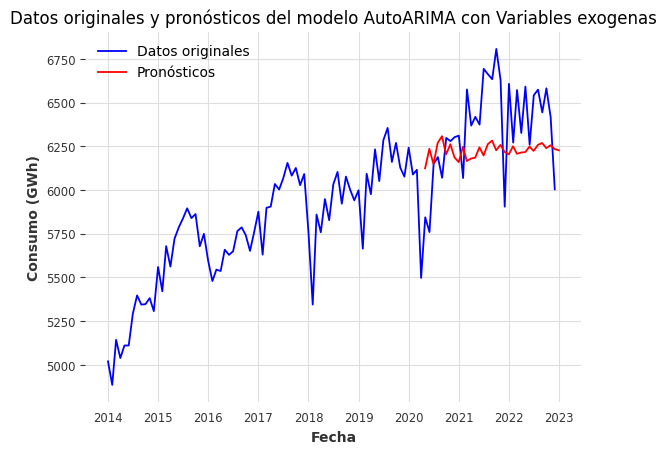

In [62]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_Colombia_diferencia.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=pronosticos_autoarima.index[0], periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
predicciones_exogenas.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(predicciones_exogenas.index, predicciones_exogenas, label='Pronósticos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo AutoARIMA con Variables exogenas')
plt.legend()
plt.show()

# Modelo SARIMA

In [63]:
# Crea y ajusta el modelo SARIMA a los datos de entrenamiento
sarima_model = sm.tsa.SARIMAX(datos_entrenamiento['Consumo'], order=( 4, 1, 4), seasonal_order=(1 , 1 , 1, 12))
sarima_result = sarima_model.fit()
sarima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              Consumo   No. Observations:                   74
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 12)   Log Likelihood                -381.607
Date:                              Sun, 14 Apr 2024   AIC                            785.213
Time:                                      21:44:29   BIC                            808.433
Sample:                                  02-01-2014   HQIC                           794.313
                                       - 03-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1961      0.710     -0.276      0.782      -1.588       1.195
ar.L2         -0.1242      0.875     -0.142      0.887      -1.839       1.590
ar.L3          0.4950      1.506      0.329      0.742      -2.457       3.447
ar.L4         -0.2126      0.730     -0.291      0.771      -1.642       1.217
ma.L1         -0.1294      0.754     -0.172      0.864      -1.607       1.349
ma.L2         -0.0211      0.786     -0.027      0.979      -1.561       1.518
ma.L3         -0.4929      1.311     -0.376      0.707      -3.063       2.077
ma.L4          0.5692      0.662      0.860      0.390      -0.728       1.867
ar.S.L12       0.0590      0.424      0.139      0.889      -0.772       0.889
ma.S.L12      -0.6374      0.396     -1.608      0.108      -1.414       0.140
sigma2      1.919e+04   5005.577      3.833      0.000    9375.020     2.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.08
Prob(H) (two-sided):                  1.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# Realiza pronósticos en el conjunto de prueba
predictions = sarima_result.get_forecast(steps=len(datos_prueba))

# Obtiene los valores pronosticados y los intervalos de confianza
forecasted_values = predictions.predicted_mean
forecasted_confidence_interval = predictions.conf_int()


## MSE

In [65]:
# Calcular los errores entre los pronósticos y los valores reales
errores = forecasted_values - datos_prueba['Consumo']

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
print("MSE:", mse)

MSE: 67793.55468969063


## MAPE

In [66]:
errores_absolutos = np.abs(forecasted_values - datos_prueba['Consumo'])

# Calcula el porcentaje de error absoluto para cada punto de datos
porcentajes_error_absoluto = (errores_absolutos / datos_prueba['Consumo']) * 100

# Calcula el MAPE como el promedio de los porcentajes de error absoluto
mape = np.mean(porcentajes_error_absoluto)

# Imprime el MAPE
print("MAPE:", mape)

MAPE: 3.2251452204248


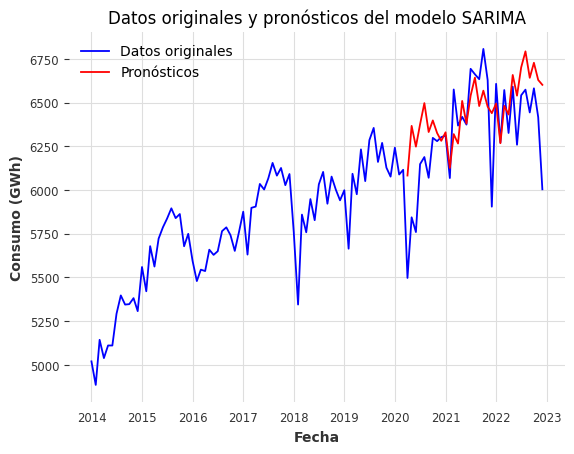

In [67]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_entrenamiento.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=fecha_inicial_pronostico, periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
pronosticos.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(forecasted_values.index, forecasted_values, label='Pronósticos', color='red')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo SARIMA')
plt.legend()
plt.show()

##Cálculo de hiperparámetros

In [68]:
m = 12  # para datos mensuales)

# Entrenamiento del modelo SARIMA automáticamente
model = auto_arima(datos_entrenamiento['Consumo'], start_p=0, start_q=0,
                   max_p=5, max_q=5, m=m,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=773.248, Time=0.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=781.588, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=775.820, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=778.212, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=774.828, Time=0.67 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 9.239 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:             

In [69]:
sarima_model = sm.tsa.SARIMAX(datos_entrenamiento['Consumo'], order=( 0, 1, 0), seasonal_order=(0, 1 , 1, 12))
sarima_result = sarima_model.fit()
sarima_result.summary()

# Realiza pronósticos en el conjunto de prueba
predictions = sarima_result.get_forecast(steps=len(datos_prueba))

# Obtiene los valores pronosticados y los intervalos de confianza
forecasted_values = predictions.predicted_mean

errores_absolutos = np.abs(forecasted_values - datos_prueba['Consumo'])

# Calcula el porcentaje de error absoluto para cada punto de datos
porcentajes_error_absoluto = (errores_absolutos / datos_prueba['Consumo']) * 100

# Calcula el MAPE como el promedio de los porcentajes de error absoluto
mape = np.mean(porcentajes_error_absoluto)

# Imprime el MAPE
print("MAPE:", mape)

MAPE: 2.966326779771696


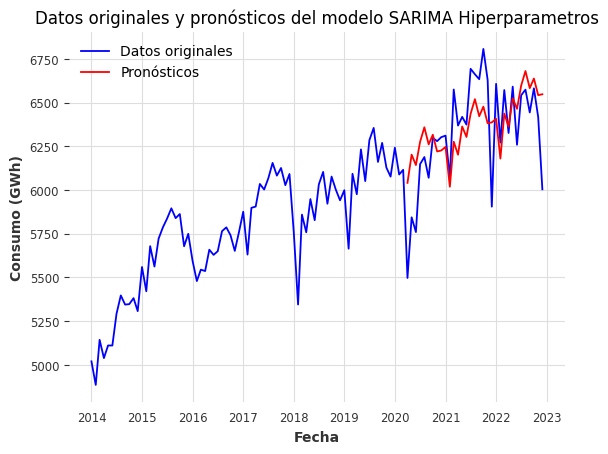

In [70]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_entrenamiento.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=fecha_inicial_pronostico, periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
pronosticos.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(forecasted_values.index, forecasted_values, label='Pronósticos', color='red')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo SARIMA Hiperparametros')
plt.legend()
plt.show()

# Modelo Holt-Winters

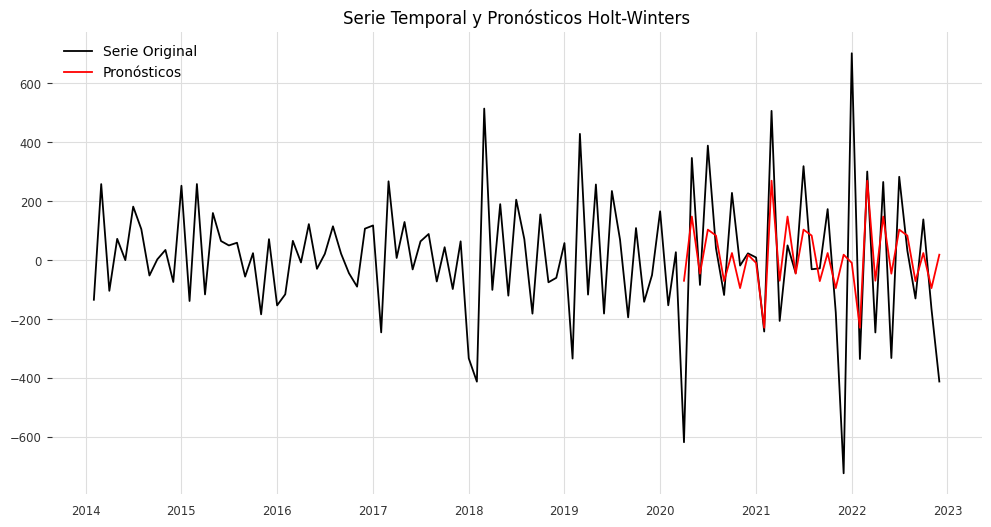

In [71]:
serie_temporal = datos_entrenamiento['Diferencia']

# Configuración del modelo Holt-Winters
modelo_hw = sm.tsa.ExponentialSmoothing(serie_temporal, seasonal='add', seasonal_periods=12)


# Ajuste del modelo
resultado = modelo_hw.fit()

# Generación de pronósticos
pronosticos_Holt = resultado.forecast(steps=len(datos_prueba))
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Diferencia'], label='Serie Original')
plt.plot(pronosticos_Holt, label='Pronósticos', color='red')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


In [72]:
pronosticos_Holt

2020-04-01    -70.180415
2020-05-01    147.837376
2020-06-01    -46.153968
2020-07-01    103.367297
2020-08-01     83.265529
2020-09-01    -71.383906
2020-10-01     23.917561
2020-11-01    -95.169823
2020-12-01     18.270052
2021-01-01     -9.493152
2021-02-01   -229.801149
2021-03-01    269.531490
2021-04-01    -70.180415
2021-05-01    147.837376
2021-06-01    -46.153968
2021-07-01    103.367297
2021-08-01     83.265529
2021-09-01    -71.383906
2021-10-01     23.917561
2021-11-01    -95.169823
2021-12-01     18.270052
2022-01-01     -9.493152
2022-02-01   -229.801149
2022-03-01    269.531490
2022-04-01    -70.180415
2022-05-01    147.837376
2022-06-01    -46.153968
2022-07-01    103.367297
2022-08-01     83.265529
2022-09-01    -71.383906
2022-10-01     23.917561
2022-11-01    -95.169823
2022-12-01     18.270052
Freq: MS, dtype: float64

In [73]:
# Invierte la diferenciación
valor_inicial = datos_entrenamiento['Consumo'].iloc[-1]  # Último valor real conocido
pronosticos_en_escala_original = pronosticos_Holt.cumsum() + valor_inicial


In [74]:
pronosticos_en_escala_original

2020-04-01    6045.179185
2020-05-01    6193.016561
2020-06-01    6146.862593
2020-07-01    6250.229890
2020-08-01    6333.495419
2020-09-01    6262.111514
2020-10-01    6286.029074
2020-11-01    6190.859252
2020-12-01    6209.129303
2021-01-01    6199.636151
2021-02-01    5969.835002
2021-03-01    6239.366492
2021-04-01    6169.186077
2021-05-01    6317.023453
2021-06-01    6270.869485
2021-07-01    6374.236782
2021-08-01    6457.502312
2021-09-01    6386.118406
2021-10-01    6410.035967
2021-11-01    6314.866144
2021-12-01    6333.136195
2022-01-01    6323.643044
2022-02-01    6093.841894
2022-03-01    6363.373385
2022-04-01    6293.192970
2022-05-01    6441.030345
2022-06-01    6394.876378
2022-07-01    6498.243674
2022-08-01    6581.509204
2022-09-01    6510.125298
2022-10-01    6534.042859
2022-11-01    6438.873036
2022-12-01    6457.143088
Freq: MS, dtype: float64

#### MSE

In [75]:
# Calcular los errores entre los pronósticos y los valores reales
errores = pronosticos_en_escala_original - datos_prueba['Consumo']

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
print("MSE:", mse)


MSE: 57867.47299151359


### MAPE

In [76]:
# Calcula el MAPE en la escala original
mape_en_escala_original = mean_absolute_percentage_error(datos_prueba['Consumo'], pronosticos_en_escala_original)*100
# Imprime el MAPE en la escala original
print("MAPE en escala original:", mape_en_escala_original)

MAPE en escala original: 3.116298117321165


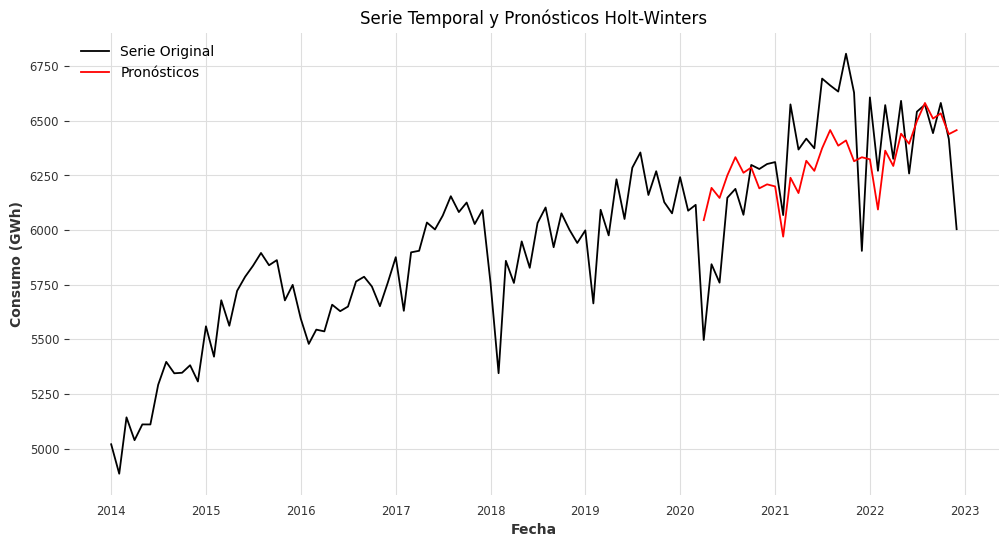

In [77]:
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Consumo'], label='Serie Original')
plt.plot(pronosticos_en_escala_original, label='Pronósticos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


## Cálculo de hiperparámetros

In [78]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from itertools import product

# Datos de ejemplo (puedes reemplazarlo con tus propios datos)
serie_temporal = datos_entrenamiento['Consumo']
ts = pd.Series(serie_temporal, index=serie_temporal.index)

# Definir parámetros para la búsqueda en cuadrícula
trend_params = ['add', 'mul', None]
seasonal_params = ['add', 'mul', None]
seasonal_periods = [12,24, 6, 18, 32]  # Para datos mensuales, pero puedes ajustar esto según la periodicidad de tus datos

# Lista para almacenar los resultados de la búsqueda en cuadrícula
results = []

# Iterar sobre todas las combinaciones de parámetros
for trend, seasonal in product(trend_params, seasonal_params):
    for sp in seasonal_periods:
        model = ExponentialSmoothing(ts, trend=trend, seasonal=seasonal, seasonal_periods=sp)
        fit_model = model.fit()

        # Calcular el error (puedes usar otras métricas como MAE según tus necesidades)
        mse = mean_squared_error(ts, fit_model.fittedvalues)

        # Guardar los resultados
        results.append({
            'trend': trend,
            'seasonal': seasonal,
            'seasonal_periods': sp,
            'mse': mse
        })

# Convertir los resultados en un DataFrame para su análisis
results_df = pd.DataFrame(results)

# Mostrar los resultados ordenados por el error cuadrático medio (MSE)
print(results_df.sort_values(by='mse'))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow 

   trend seasonal  seasonal_periods           mse
1    add      add                24   7323.292479
36  None      mul                24   7326.926069
31  None      add                24   7445.784040
16   mul      add                24   7601.491718
6    add      mul                24   8172.504974
30  None      add                12   9424.094216
35  None      mul                12   9469.758671
21   mul      mul                24   9506.285366
0    add      add                12   9521.435774
5    add      mul                12   9694.740505
20   mul      mul                12   9791.823851
15   mul      add                12  10311.987740
34  None      add                32  16472.219519
33  None      add                18  19940.218742
37  None      mul                 6  20067.650520
32  None      add                 6  20202.609932
2    add      add                 6  20205.288459
7    add      mul                 6  20330.245813
22   mul      mul                 6  21321.291995


## Aplicación del modelo con hiperparámetros ajustados

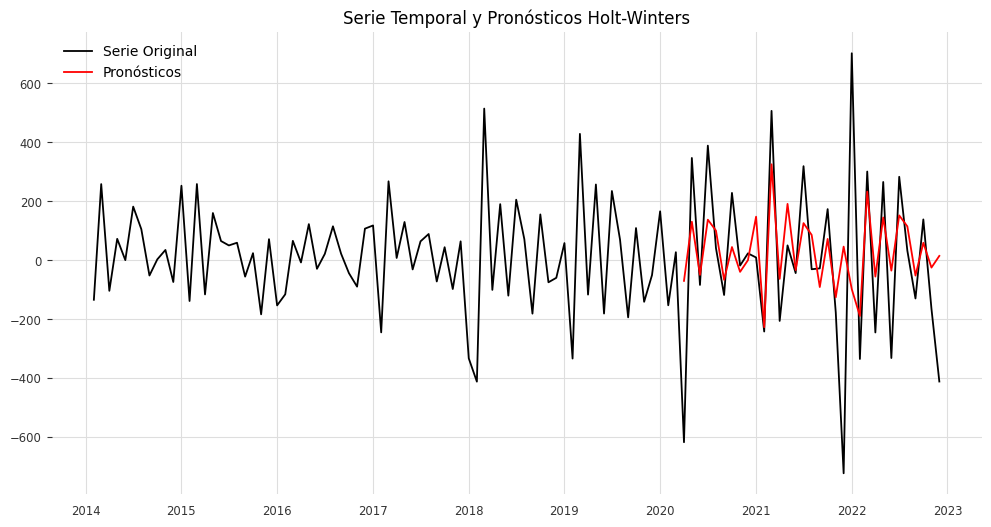

In [79]:
serie_temporal = datos_entrenamiento['Diferencia']

# Configuración del modelo Holt-Winters
modelo_hw = sm.tsa.ExponentialSmoothing(serie_temporal,seasonal='add', trend= 'add', seasonal_periods=24)

# Ajuste del modelo
resultado = modelo_hw.fit()

# Generación de pronósticos
pronosticos_Holt = resultado.forecast(steps=len(datos_prueba))
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Diferencia'], label='Serie Original')
plt.plot(pronosticos_Holt, label='Pronósticos', color='red')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


In [80]:
pronosticos_Holt

2020-04-01    -70.616413
2020-05-01    130.211889
2020-06-01    -50.318342
2020-07-01    137.198744
2020-08-01     99.970455
2020-09-01    -67.083009
2020-10-01     44.287828
2020-11-01    -39.969855
2020-12-01     -0.304258
2021-01-01    147.379538
2021-02-01   -227.760119
2021-03-01    325.262624
2021-04-01    -63.869464
2021-05-01    190.860727
2021-06-01    -34.146682
2021-07-01    125.492612
2021-08-01     85.455782
2021-09-01    -91.575602
2021-10-01     71.876095
2021-11-01   -126.397397
2021-12-01     45.712771
2022-01-01    -98.598231
2022-02-01   -189.868703
2022-03-01    232.512792
2022-04-01    -56.138694
2022-05-01    144.689608
2022-06-01    -35.840623
2022-07-01    151.676462
2022-08-01    114.448173
2022-09-01    -52.605290
2022-10-01     58.765547
2022-11-01    -25.492136
2022-12-01     14.173460
Freq: MS, dtype: float64

In [81]:
# Invierte la diferenciación
valor_inicial = datos_entrenamiento['Consumo'].iloc[-1]  # Último valor real conocido
pronosticos_en_escala_original = pronosticos_Holt.cumsum() + valor_inicial


In [82]:
pronosticos_en_escala_original

2020-04-01    6044.743187
2020-05-01    6174.955076
2020-06-01    6124.636734
2020-07-01    6261.835478
2020-08-01    6361.805932
2020-09-01    6294.722923
2020-10-01    6339.010752
2020-11-01    6299.040897
2020-12-01    6298.736639
2021-01-01    6446.116176
2021-02-01    6218.356057
2021-03-01    6543.618681
2021-04-01    6479.749218
2021-05-01    6670.609944
2021-06-01    6636.463262
2021-07-01    6761.955874
2021-08-01    6847.411657
2021-09-01    6755.836055
2021-10-01    6827.712150
2021-11-01    6701.314753
2021-12-01    6747.027524
2022-01-01    6648.429293
2022-02-01    6458.560591
2022-03-01    6691.073382
2022-04-01    6634.934688
2022-05-01    6779.624296
2022-06-01    6743.783673
2022-07-01    6895.460135
2022-08-01    7009.908308
2022-09-01    6957.303018
2022-10-01    7016.068565
2022-11-01    6990.576429
2022-12-01    7004.749890
Freq: MS, dtype: float64

#### MSE

In [83]:
mse = mean_squared_error(serie_temporal, resultado.fittedvalues)
mse

9366.39724639992

### MAPE

In [84]:
# Calcula el MAPE en la escala original
mape_en_escala_original = (mean_absolute_percentage_error(datos_prueba['Consumo'], pronosticos_en_escala_original))*100
# Imprime el MAPE en la escala original
print("MAPE en escala original:", mape_en_escala_original)


MAPE en escala original: 4.264747301928924


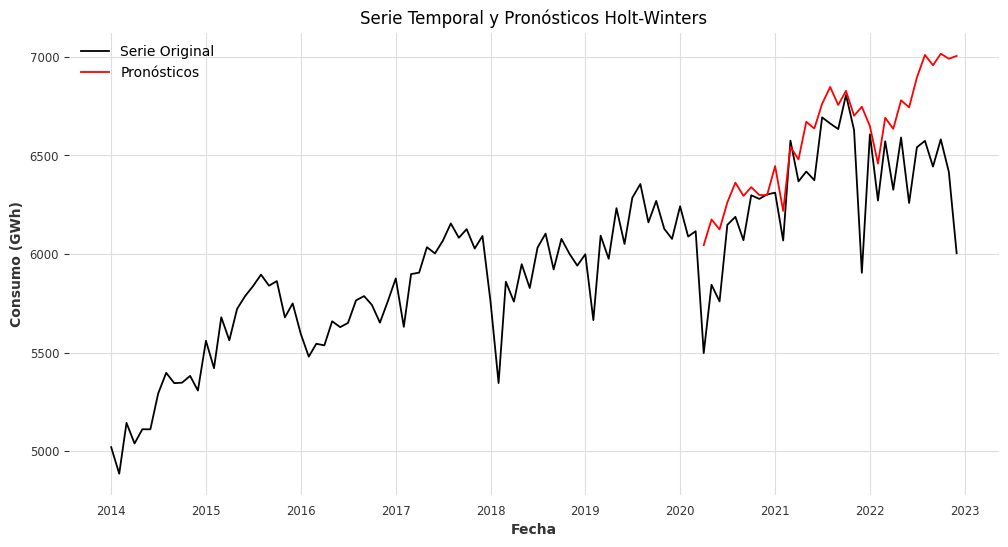

In [85]:
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Consumo'], label='Serie Original')
plt.plot(pronosticos_en_escala_original, label='Pronósticos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


### Segundo modelo ajustado con hiperparámetros

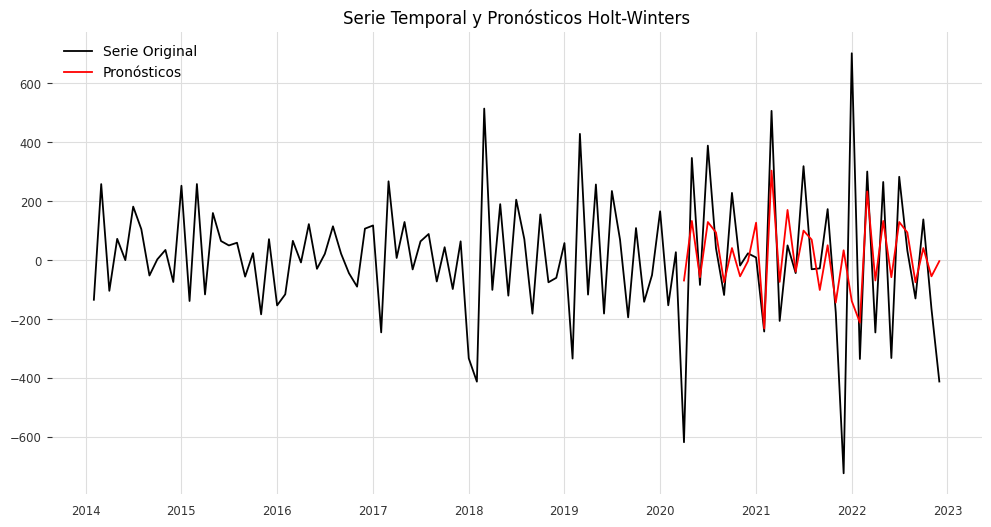

In [86]:
serie_temporal = datos_entrenamiento['Diferencia']

# Configuración del modelo Holt-Winters
modelo_hw = sm.tsa.ExponentialSmoothing(serie_temporal,seasonal='add', seasonal_periods=24)

# Ajuste del modelo
resultado = modelo_hw.fit()

# Generación de pronósticos
pronosticos_Holt = resultado.forecast(steps=len(datos_prueba))
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Diferencia'], label='Serie Original')
plt.plot(pronosticos_Holt, label='Pronósticos', color='red')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


In [87]:
pronosticos_Holt

2020-04-01    -69.315919
2020-05-01    132.937464
2020-06-01    -58.226321
2020-07-01    129.256394
2020-08-01     93.761349
2020-09-01    -75.401228
2020-10-01     40.844862
2020-11-01    -55.092987
2020-12-01     -3.622589
2021-01-01    126.953898
2021-02-01   -232.556934
2021-03-01    303.710364
2021-04-01    -74.157559
2021-05-01    170.304852
2021-06-01    -39.382738
2021-07-01    100.106307
2021-08-01     69.353977
2021-09-01   -101.607252
2021-10-01     50.372753
2021-11-01   -144.291876
2021-12-01     33.299143
2022-01-01   -139.095583
2022-02-01   -212.271997
2022-03-01    232.957817
2022-04-01    -69.315919
2022-05-01    132.937464
2022-06-01    -58.226321
2022-07-01    129.256394
2022-08-01     93.761349
2022-09-01    -75.401228
2022-10-01     40.844862
2022-11-01    -55.092987
2022-12-01     -3.622589
Freq: MS, dtype: float64

In [88]:
# Invierte la diferenciación
valor_inicial = datos_entrenamiento['Consumo'].iloc[-1]  # Último valor real conocido
pronosticos_en_escala_original = pronosticos_Holt.cumsum() + valor_inicial


In [89]:
pronosticos_en_escala_original

2020-04-01    6046.043681
2020-05-01    6178.981146
2020-06-01    6120.754825
2020-07-01    6250.011219
2020-08-01    6343.772569
2020-09-01    6268.371340
2020-10-01    6309.216202
2020-11-01    6254.123216
2020-12-01    6250.500626
2021-01-01    6377.454525
2021-02-01    6144.897590
2021-03-01    6448.607955
2021-04-01    6374.450396
2021-05-01    6544.755248
2021-06-01    6505.372510
2021-07-01    6605.478817
2021-08-01    6674.832794
2021-09-01    6573.225541
2021-10-01    6623.598295
2021-11-01    6479.306419
2021-12-01    6512.605562
2022-01-01    6373.509980
2022-02-01    6161.237982
2022-03-01    6394.195800
2022-04-01    6324.879881
2022-05-01    6457.817345
2022-06-01    6399.591025
2022-07-01    6528.847419
2022-08-01    6622.608768
2022-09-01    6547.207540
2022-10-01    6588.052402
2022-11-01    6532.959415
2022-12-01    6529.336826
Freq: MS, dtype: float64

#### MSE

In [90]:
mse = mean_squared_error(serie_temporal, resultado.fittedvalues)
mse

9024.651240751615

#### MAPE

In [91]:
# Calcula el MAPE en la escala original
mape_en_escala_original = (mean_absolute_percentage_error(datos_prueba['Consumo'], pronosticos_en_escala_original))*100
# Imprime el MAPE en la escala original
print("MAPE en escala original:", mape_en_escala_original)


MAPE en escala original: 2.495956181176444


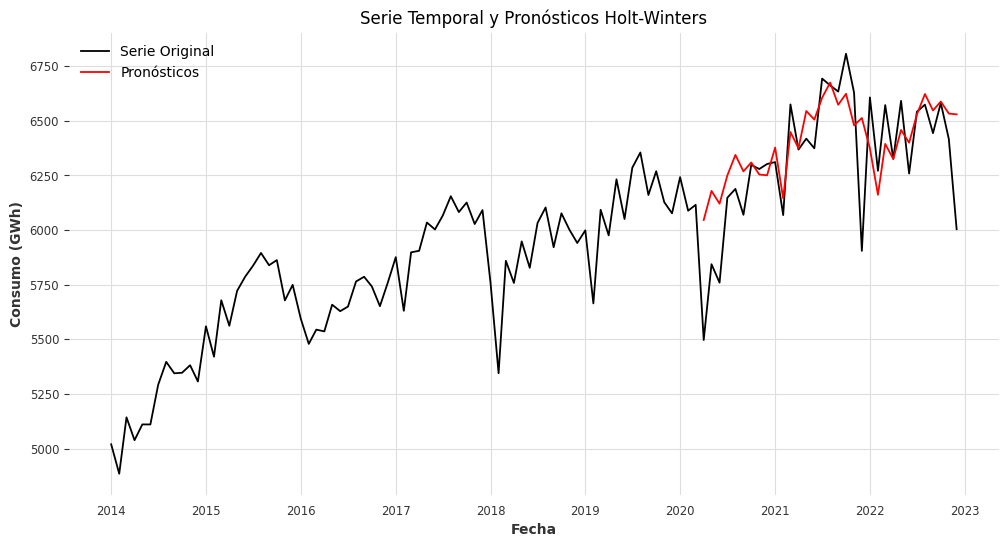

In [92]:
# Visualización de los datos originales y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(datos_Colombia['Consumo'], label='Serie Original')
plt.plot(pronosticos_en_escala_original, label='Pronósticos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.title('Serie Temporal y Pronósticos Holt-Winters')
plt.show()


# Implementación del Framework Darts

In [93]:
print (type(datos_entrenamiento['Consumo']))

datos_entrenamiento_darts = datos_Colombia['Consumo']


# Convertir la serie de pandas a un objeto TimeSeries de darts
datos_entrenamiento_darts = TimeSeries.from_series(datos_entrenamiento_darts)

# Ahora tienes la serie en formato TimeSeries de darts
print(type(datos_entrenamiento_darts))


<class 'pandas.core.series.Series'>
<class 'darts.timeseries.TimeSeries'>


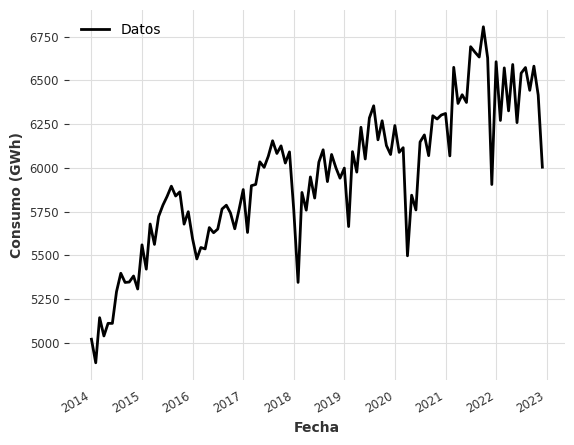

In [94]:
datos_entrenamiento_darts.plot(label='Datos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.legend();

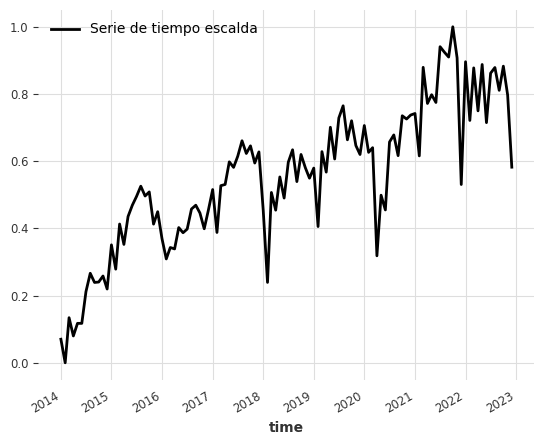

In [95]:
serie_tiempo = Scaler()
serie_tiempo_escalado = serie_tiempo.fit_transform(datos_entrenamiento_darts)

serie_tiempo_escalado.plot(label='Serie de tiempo escalda')
plt.legend();

In [96]:
len(serie_tiempo_escalado)

108

In [97]:
# Train And Validation Split
# Calcula el índice que separa los datos de entrenamiento y prueba
indice_separacion = int(len(datos_Colombia_diferencia) * 0.7)

datos_entrenamiento_escalado, datos_test_escalado = serie_tiempo_escalado[:indice_separacion], serie_tiempo_escalado[indice_separacion:]

print(len(datos_entrenamiento_escalado))
print(len(datos_test_escalado))

74
34


##NBEATSModel

In [98]:
modelo = NBEATSModel(input_chunk_length=12, output_chunk_length=6, n_epochs=100, random_state=0)

In [99]:
modelo.fit(datos_entrenamiento_escalado, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.406    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=12, output_chunk_length=6, n_epochs=100, random_state=0)

In [100]:
pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

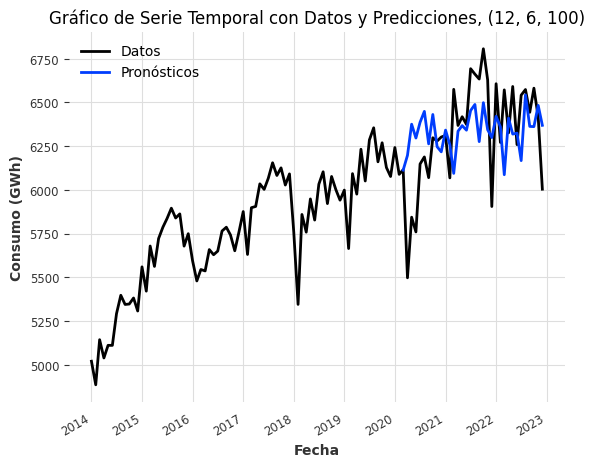

In [101]:
# Revertir la escala para obtener los valores originales
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones__e_normal = serie_tiempo.inverse_transform(pred)

serie_tiempo_original.plot(label='Datos')
predicciones__e_normal.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal con Datos y Predicciones, (12, 6, 100)')
plt.legend();

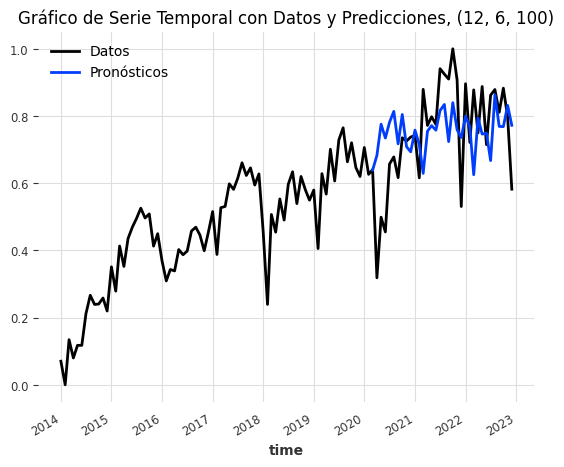

In [102]:

serie_tiempo_escalado.plot(label='Datos')
pred.plot(label='Pronósticos')
plt.title('Gráfico de Serie Temporal con Datos y Predicciones, (12, 6, 100)')
plt.legend();


### MAPE

In [103]:
# Convertir 'pred' a un DataFrame de pandas
pred_df = pred.pd_dataframe()
datos_test_escalado_df=datos_test_escalado.pd_dataframe()

def calculate_mape(y_true, y_pred):
    return (abs(y_true - y_pred) / y_true).mean() * 100

# Calcular el MAPE entre las dos columnas
mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

print('MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: {:.2f}%'.format(mape_value))

MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: 15.91%


 ### Grid Search para optimizar parámetros del modelo N-BEAST

In [104]:
# Definir el diccionario de parámetros
param_grid = {
    'input_chunk_length': [6, 12, 18, 24],
    'output_chunk_length': [6, 12, 18, 24],
    'n_epochs': [50, 100, 150],
}
# Crear un diccionario para almacenar los resultados
resultados = {}
serie_tiempo_escalado.plot(label='Datos')
# Iterar sobre todas las combinaciones de hiperparámetros
for input_chunk_length1, output_chunk_length1, n_epochs1 in product(param_grid['input_chunk_length'],
                                                                    param_grid['output_chunk_length'],
                                                                    param_grid['n_epochs']):
    modelo = NBEATSModel(input_chunk_length=input_chunk_length1, output_chunk_length=output_chunk_length1, n_epochs=n_epochs1, random_state=0)

    # Entrenar el modelo con los nuevos hiperparámetros
    modelo.fit(datos_entrenamiento_escalado)

    # Evaluar el modelo, guardar resultados, etc.
    pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)
    pred_df = pred.pd_dataframe()
    datos_test_escalado_df = datos_test_escalado.pd_dataframe()

    def calculate_mape(y_true, y_pred):
        return (abs(y_true - y_pred) / y_true).mean() * 100

    mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

    # Almacenar los resultados en el diccionario
    resultados[(input_chunk_length1, output_chunk_length1, n_epochs1)] = mape_value

# Suponiendo que 'resultados' es tu diccionario de resultados
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Hiperparámetros', 'MAPE'])

# Imprimir el DataFrame
print(df_resultados)

"# Definir el diccionario de parámetros\nparam_grid = {\n    'input_chunk_length': [6, 12, 18, 24],\n    'output_chunk_length': [6, 12, 18, 24],\n    'n_epochs': [50, 100, 150],\n}\n# Crear un diccionario para almacenar los resultados\nresultados = {}\nserie_tiempo_escalado.plot(label='Datos')\n# Iterar sobre todas las combinaciones de hiperparámetros\nfor input_chunk_length1, output_chunk_length1, n_epochs1 in product(param_grid['input_chunk_length'],\n                                                                    param_grid['output_chunk_length'],\n                                                                    param_grid['n_epochs']):\n    modelo = NBEATSModel(input_chunk_length=input_chunk_length1, output_chunk_length=output_chunk_length1, n_epochs=n_epochs1, random_state=0)\n\n    # Entrenar el modelo con los nuevos hiperparámetros\n    modelo.fit(datos_entrenamiento_escalado)\n\n    # Evaluar el modelo, guardar resultados, etc.\n    pred = modelo.predict(n=len(datos_test

In [105]:
print(df_resultados)

'print(df_resultados)'

In [106]:
'''#Guardar el DataFrame en un archivo CSV en Google Drive
df_resultados.to_csv('/content/drive/MyDrive/error-grid/df_resultados_f.csv', index=False)

#Confirmación de guardado
print("DataFrame guardado en Google Drive como 'df_resultados.csv'")'''

'#Guardar el DataFrame en un archivo CSV en Google Drive\ndf_resultados.to_csv(\'/content/drive/MyDrive/error-grid/df_resultados_f.csv\', index=False)\n\n#Confirmación de guardado\nprint("DataFrame guardado en Google Drive como \'df_resultados.csv\'")'

In [107]:
'''# Ordenar el DataFrame por la columna 'Hiperparámetros' en orden descendente
df_resultados = df_resultados.sort_values(by='MAPE')

# Imprimir el DataFrame ordenado
print(df_resultados)'''


"# Ordenar el DataFrame por la columna 'Hiperparámetros' en orden descendente\ndf_resultados = df_resultados.sort_values(by='MAPE')\n\n# Imprimir el DataFrame ordenado\nprint(df_resultados)"

### Selección del mejor modelo

In [108]:
modelo = NBEATSModel(input_chunk_length=24, output_chunk_length=24, n_epochs=100, random_state=0)

In [109]:
modelo.fit(datos_entrenamiento_escalado, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.796    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=24, n_epochs=100, random_state=0)

In [110]:
pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

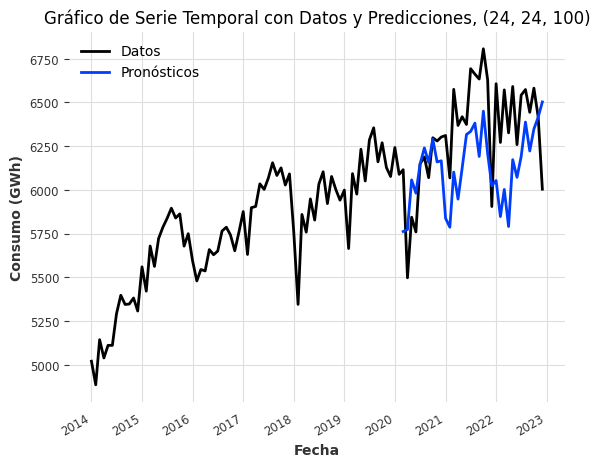

In [111]:
# Revertir la escala para obtener los valores originales
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones__e_normal = serie_tiempo.inverse_transform(pred)

serie_tiempo_original.plot(label='Datos')
predicciones__e_normal.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal con Datos y Predicciones, (24, 24, 100)')
plt.legend();

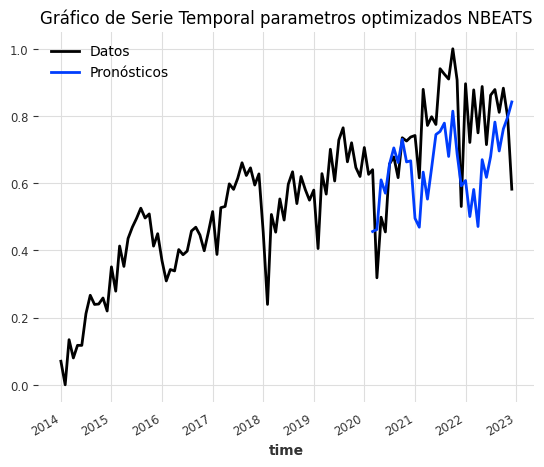

In [112]:
serie_tiempo_escalado.plot(label='Datos')
pred.plot(label='Pronósticos')
plt.title('Gráfico de Serie Temporal parametros optimizados NBEATS')
plt.legend();


In [113]:
# Convertir 'pred' a un DataFrame de pandas
pred_df = pred.pd_dataframe()
datos_test_escalado_df=datos_test_escalado.pd_dataframe()

def calculate_mape(y_true, y_pred):
    return (abs(y_true - y_pred) / y_true).mean() * 100

# Calcular el MAPE entre las dos columnas
mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

print('MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: {:.2f}%'.format(mape_value))

MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: 24.22%


Se observa un sobreajuste en el modelo con mejor desempeño, en base al MAPE, por lo cual se decide probar un modelo con el MAPE promedio para evitar sobrejustes

In [114]:
modelo = NBEATSModel(input_chunk_length=18, output_chunk_length=18, n_epochs=150, random_state=0)

In [115]:
modelo.fit(datos_entrenamiento_escalado, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.603    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=18, output_chunk_length=18, n_epochs=150, random_state=0)

In [116]:
pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

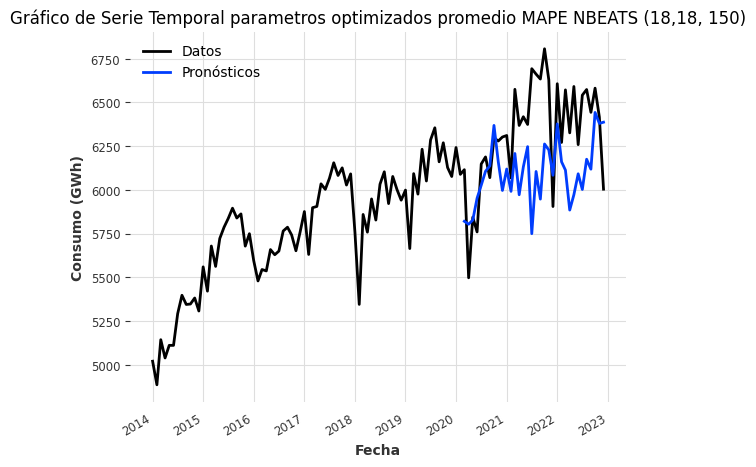

In [117]:
# Revertir la escala para obtener los valores originales
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones__e_normal = serie_tiempo.inverse_transform(pred)

serie_tiempo_original.plot(label='Datos')
predicciones__e_normal.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal parametros optimizados promedio MAPE NBEATS (18,18, 150)')
plt.legend();

In [118]:
# Convertir 'pred' a un DataFrame de pandas
pred_df = pred.pd_dataframe()
datos_test_escalado_df=datos_test_escalado.pd_dataframe()

def calculate_mape(y_true, y_pred):
    return (abs(y_true - y_pred) / y_true).mean() * 100

# Calcular el MAPE entre las dos columnas
mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

print('MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: {:.2f}%'.format(mape_value))

MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: 26.19%


In [119]:
hiperparametros = [
    (18, 6, 150),
    (18, 6, 100),
    (18, 6, 150),
    (18, 6, 100),
    (12, 6, 100),
    (18, 6, 50),
    (12, 6, 50),
    (24, 6, 50),
    (24, 6, 100),
    (24, 12, 50),
    (24, 6, 150),
    (18, 12, 100),
    (24, 12, 100),
    (24, 12, 150),
    (18, 24, 150),
    (24, 18, 150),
    (18, 18, 50),
    (12, 18, 150),
    (18, 12, 150),
    (18, 24, 100),
    (24, 24, 100),
    (18, 18, 100),
    (24, 18, 100),
    (18, 12, 50),
    (12, 18, 50),
    (18, 18, 150)
    ]

for hparams in hiperparametros:
    input_chunk_length, output_chunk_length, n_epochs = hparams

    modelo = NBEATSModel(input_chunk_length=input_chunk_length, output_chunk_length=output_chunk_length, n_epochs=n_epochs, random_state=0)
    modelo.fit(datos_entrenamiento_escalado, verbose=True)

    pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)

    serie_tiempo_escalado.plot(label='Datos')
    pred.plot(label='Forecast')
    plt.title(f'Gráfico de Serie Temporal con hiperparámetros: {hparams}')
    plt.legend()
    plt.show()

    # Convertir 'pred' a un DataFrame de pandas
    pred_df = pred.pd_dataframe()
    datos_test_escalado_df = datos_test_escalado.pd_dataframe()

    # Calcular el MAPE entre las dos columnas
    mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

    print('MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df con hiperparámetros {}: {:.2f}%'.format(hparams, mape_value))

'hiperparametros = [\n    (18, 6, 150),\n    (18, 6, 100),\n    (18, 6, 150),\n    (18, 6, 100),\n    (12, 6, 100),\n    (18, 6, 50),\n    (12, 6, 50),\n    (24, 6, 50),\n    (24, 6, 100),\n    (24, 12, 50),\n    (24, 6, 150),\n    (18, 12, 100),\n    (24, 12, 100),\n    (24, 12, 150),\n    (18, 24, 150),\n    (24, 18, 150),\n    (18, 18, 50),\n    (12, 18, 150),\n    (18, 12, 150),\n    (18, 24, 100),\n    (24, 24, 100),\n    (18, 18, 100),\n    (24, 18, 100),\n    (18, 12, 50),\n    (12, 18, 50),\n    (18, 18, 150)\n    ]\n\nfor hparams in hiperparametros:\n    input_chunk_length, output_chunk_length, n_epochs = hparams\n\n    modelo = NBEATSModel(input_chunk_length=input_chunk_length, output_chunk_length=output_chunk_length, n_epochs=n_epochs, random_state=0)\n    modelo.fit(datos_entrenamiento_escalado, verbose=True)\n\n    pred = modelo.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)\n\n    serie_tiempo_escalado.plot(label=\'Datos\')\n    pred.plot(label=\

## Modelo RNN

In [120]:
model_RNN = RNNModel(
    model="RNN",
    hidden_dim=20,
    batch_size=36,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Energia",
    random_state=0,
    training_length=36,
    input_chunk_length=36,
    output_chunk_length=6,

)
model_RNN.fit(datos_entrenamiento_escalado,verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 460   
4 | V             | Linear           | 21    
---------------------------------------------------
481       Trainable params
0         Non-trainable params
481       Total params
0.002     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


RNNModel(model=RNN, hidden_dim=20, n_rnn_layers=1, dropout=0.0, training_length=36, batch_size=36, n_epochs=100, optimizer_kwargs={'lr': 0.001}, model_name=Energia, random_state=0, input_chunk_length=36, output_chunk_length=6)

In [121]:
pred_RNN = model_RNN.predict(n=len(datos_test_escalado))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

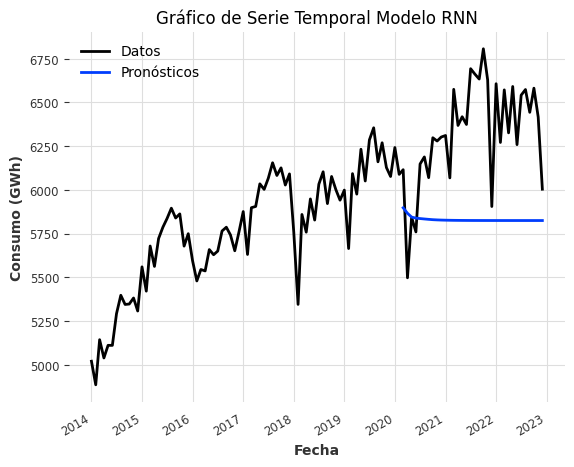

In [122]:
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones_e_normal_RNN = serie_tiempo.inverse_transform(pred_RNN)

serie_tiempo_original .plot(label='Datos')
predicciones_e_normal_RNN.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Modelo RNN')
plt.legend();


### MSE

In [123]:
# Calcular los errores entre los pronósticos y los valores reales
errores = pred_RNN - datos_test_escalado

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
##print("MSE:", mse)

### MAPE

In [124]:
mape = darts.metrics.mape(model_RNN.predict(n=len(datos_test_escalado)), datos_test_escalado)
print("MAPE:", mape)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE: 55.564285756821505


### Grid Search para optimizar parámetros de la RNN

In [125]:
# Definir el diccionario de parámetros
param_grid = {
    'input_chunk_length': [12,24,36],
    'n_epochs': [50, 100, 150],
    'hidden_dim':[10,20,30],
    'batch_size':[12,18,24],
    'training_length':[12,24,36],
}

# Crear un diccionario para almacenar los resultados
resultados = {}
# Iterar sobre todas las combinaciones de hiperparámetros
for input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1 in product(param_grid['input_chunk_length'], param_grid['n_epochs'],
                                                                    param_grid['hidden_dim'], param_grid['batch_size'], param_grid['training_length']):
    model_RNN = RNNModel(
      model="RNN",
      hidden_dim=hidden_dim1,
      batch_size=batch_size1,
      n_epochs=n_epochs1,
      model_name="Energia",
      random_state=0,
      training_length=training_length1,
      input_chunk_length=input_chunk_length1,
    )
    model_RNN.fit(datos_entrenamiento_escalado,verbose=False)

    # Evaluar el modelo, guardar resultados
    mape_value = darts.metrics.mape(model_RNN.predict(n=len(datos_test_escalado)), datos_test_escalado)

    # Almacenar los resultados en el diccionario
    resultados[(input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1)] = mape_value


# Suponiendo que 'resultados' es tu diccionario de resultados
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Hiperparámetros', 'MAPE'])
df_resultados = df_resultados.sort_values(by='MAPE')
df_resultados.to_csv('/content/drive/MyDrive/error-grid/df_RNN_resultados1.csv', index=False)
# Imprimir el DataFrame
print(df_resultados)

'# Definir el diccionario de parámetros\nparam_grid = {\n    \'input_chunk_length\': [12,24,36],\n    \'n_epochs\': [50, 100, 150],\n    \'hidden_dim\':[10,20,30],\n    \'batch_size\':[12,18,24],\n    \'training_length\':[12,24,36],\n}\n\n# Crear un diccionario para almacenar los resultados\nresultados = {}\n# Iterar sobre todas las combinaciones de hiperparámetros\nfor input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1 in product(param_grid[\'input_chunk_length\'], param_grid[\'n_epochs\'],\n                                                                    param_grid[\'hidden_dim\'], param_grid[\'batch_size\'], param_grid[\'training_length\']):\n    model_RNN = RNNModel(\n      model="RNN",\n      hidden_dim=hidden_dim1,\n      batch_size=batch_size1,\n      n_epochs=n_epochs1,\n      model_name="Energia",\n      random_state=0,\n      training_length=training_length1,\n      input_chunk_length=input_chunk_length1,\n    )\n    model_RNN.fit(datos_entrenamient

## Selección del mejor modelo RNN

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

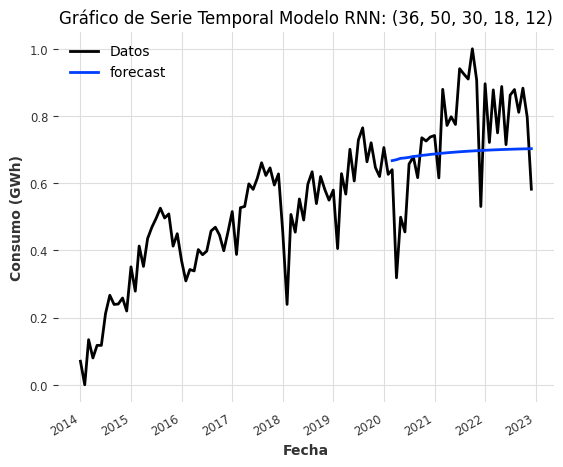

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

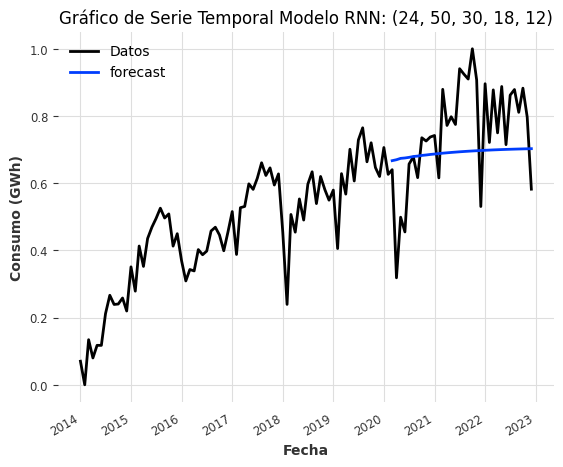

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

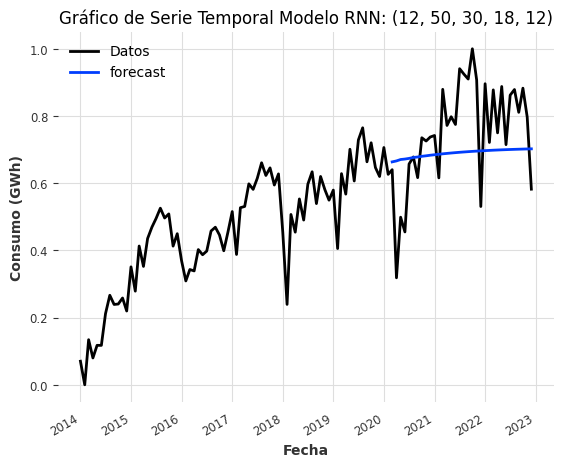

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

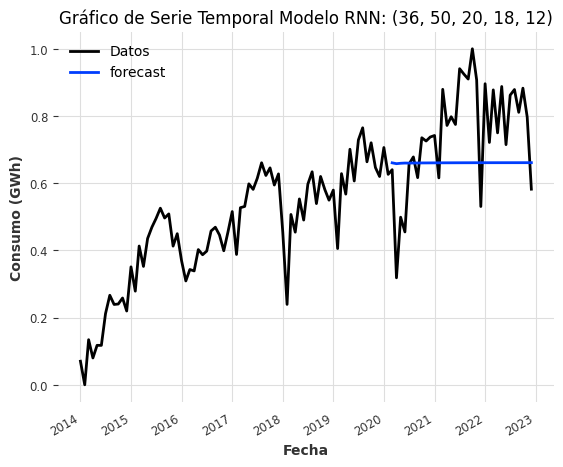

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

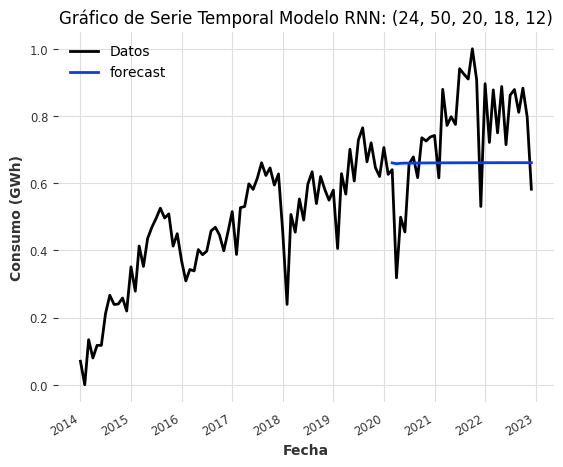

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

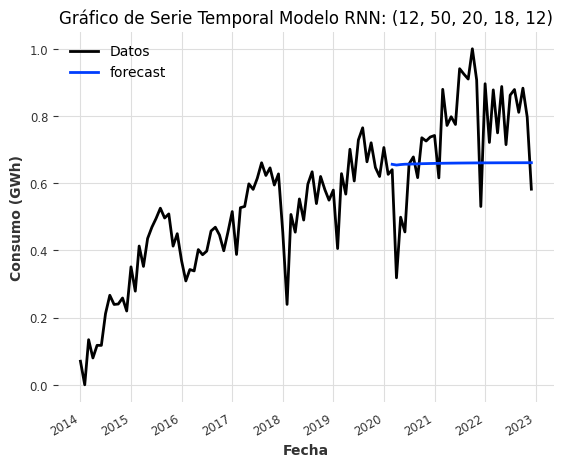

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

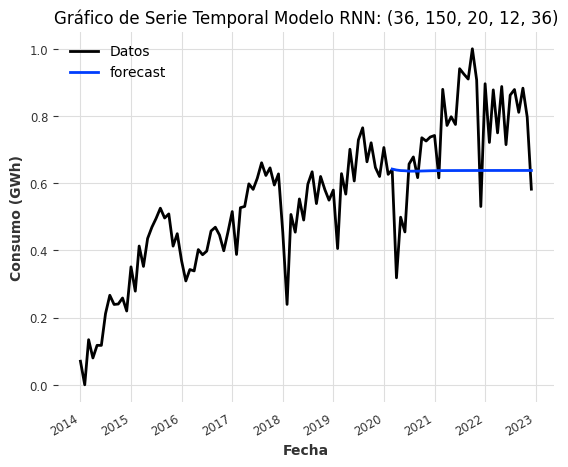

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

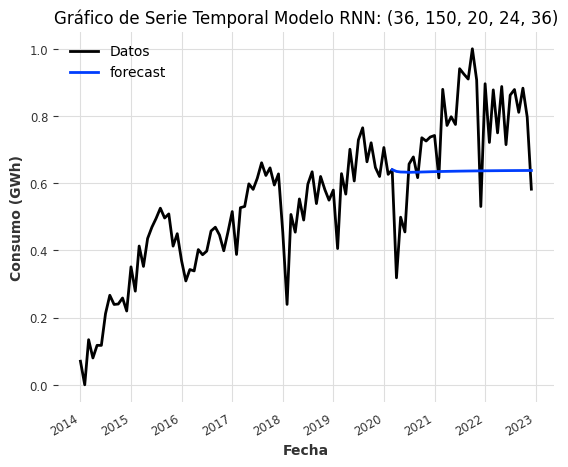

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

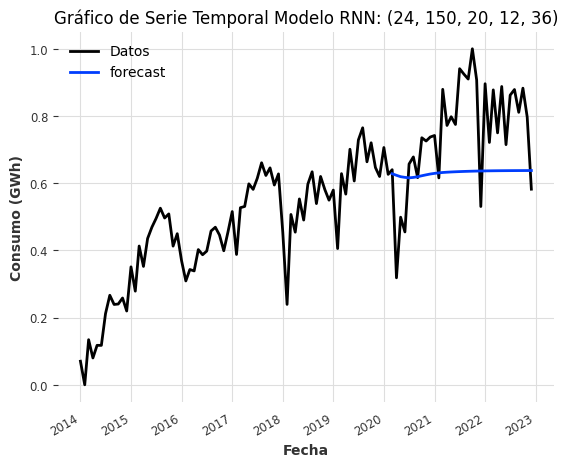

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=150` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

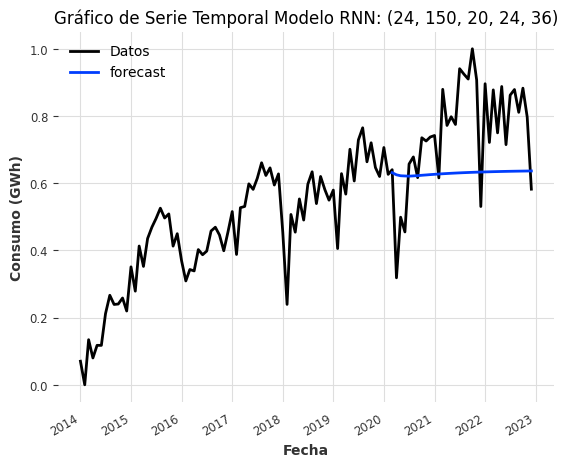

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

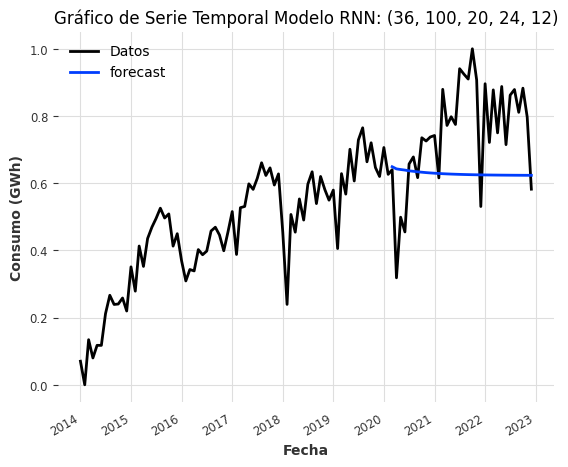

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

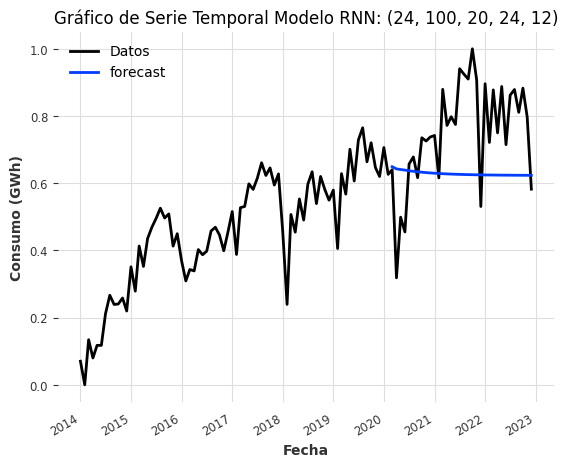

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

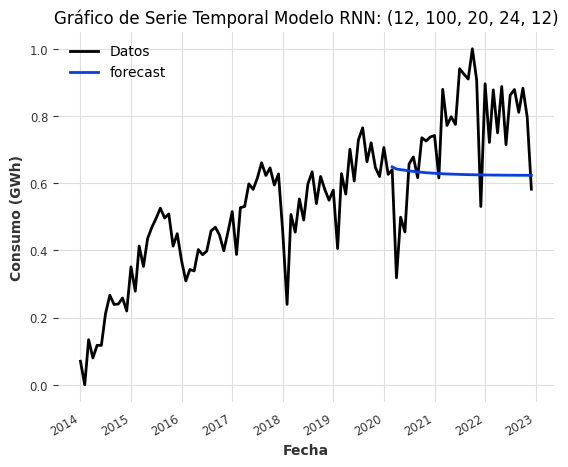

In [126]:

# Definir hiperparámetros
hiperparametros= [
    (36, 50, 30, 18, 12),
    (24, 50, 30, 18, 12),
    (12, 50, 30, 18, 12),
    (36, 50, 20, 18, 12),
    (24, 50, 20, 18, 12),
    (12, 50, 20, 18, 12),
    (36, 150, 20, 12, 36),
    (36, 150, 20, 24, 36),
    (24, 150, 20, 12, 36),
    (24, 150, 20, 24, 36),
    (36, 100, 20, 24, 12),
    (24, 100, 20, 24, 12),
    (12, 100, 20, 24, 12),
]

# Iterar sobre todas las combinaciones de hiperparámetros
for hparams in hiperparametros:
  input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1 = hparams
  model_RNN = RNNModel(
      model="RNN",
      hidden_dim=hidden_dim1,
      batch_size=batch_size1,
      n_epochs=n_epochs1,
      model_name="Energia",
      random_state=0,
      training_length=training_length1,
      input_chunk_length=input_chunk_length1)

  model_RNN.fit(datos_entrenamiento_escalado,verbose=False)
  pred_RNN = model_RNN.predict(n=len(datos_test_escalado))
  mape_value = darts.metrics.mape(model_RNN.predict(n=len(datos_test_escalado)), datos_test_escalado)
  plt.figure()  # Crear una nueva figura en cada iteración
  serie_tiempo_escalado.plot(label='Datos')
  pred_RNN.plot(label='forecast')
  plt.xlabel('Fecha')
  plt.ylabel('Consumo (GWh)')
  plt.title(f'Gráfico de Serie Temporal Modelo RNN: {hparams}')
  plt.legend()
  plt.show()

## Modelo RNN seleccionado

In [127]:
'input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1'
model_RNN = RNNModel(
    model="RNN",
    input_chunk_length=36,
    n_epochs=50,
    hidden_dim=30,
    batch_size=18,
    training_length=12,

    optimizer_kwargs={"lr": 1e-3},
    model_name="Energia",
    random_state=0,
    output_chunk_length=6,

)
model_RNN.fit(datos_entrenamiento_escalado,verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 990   
4 | V             | Linear           | 31    
---------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


RNNModel(model=RNN, hidden_dim=30, n_rnn_layers=1, dropout=0.0, training_length=12, input_chunk_length=36, n_epochs=50, batch_size=18, optimizer_kwargs={'lr': 0.001}, model_name=Energia, random_state=0, output_chunk_length=6)

In [128]:
pred_RNN = model_RNN.predict(n=len(datos_test_escalado))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

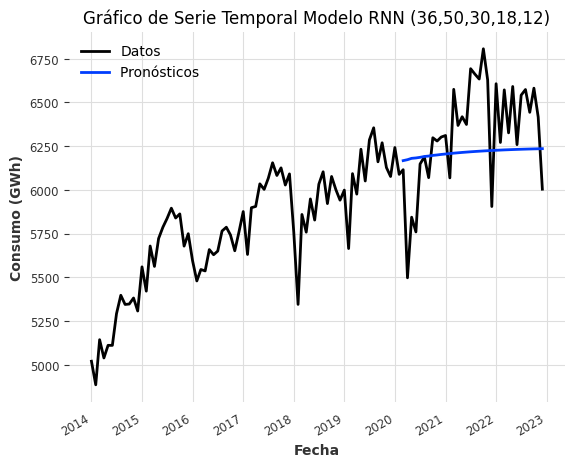

In [129]:
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones_e_normal_RNN = serie_tiempo.inverse_transform(pred_RNN)

serie_tiempo_original .plot(label='Datos')
predicciones_e_normal_RNN.plot(label='Pronósticos ')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Modelo RNN (36,50,30,18,12)')
plt.legend();


### MSE

In [130]:
# Calcular los errores entre los pronósticos y los valores reales
errores = pred_RNN - datos_test_escalado

# Elevar los errores al cuadrado
errores_cuadrados = errores ** 2

# Calcular el MSE como el promedio de los errores al cuadrado
mse = errores_cuadrados.mean()

# Imprimir el MSE
##print("MSE:", mse)

### MAPE

In [131]:
mape = darts.metrics.mape(model_RNN.predict(n=len(datos_test_escalado)), datos_test_escalado)
print("MAPE:", mape)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE: 18.970562161827228


### Segundo modelo RNN

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 460   
4 | V             | Linear           | 21    
---------------------------------------------------
481       Trainable params
0         Non-trainable params
481       Total params
0.002     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

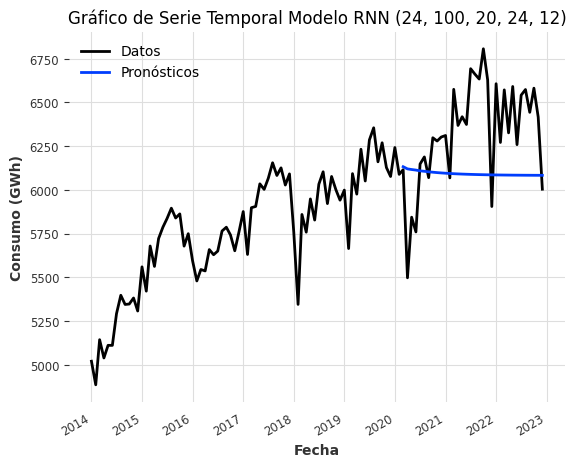

In [132]:
'input_chunk_length1, n_epochs1, hidden_dim1, batch_size1, training_length1'
model_RNN = RNNModel(
    model="RNN",
    input_chunk_length=24,
    n_epochs=100,
    hidden_dim=20,
    batch_size=24,
    training_length=12,

    optimizer_kwargs={"lr": 1e-3},
    model_name="Energia",
    random_state=0,
    output_chunk_length=6,

)
model_RNN.fit(datos_entrenamiento_escalado,verbose=True)

pred_RNN = model_RNN.predict(n=len(datos_test_escalado))
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones_e_normal_RNN = serie_tiempo.inverse_transform(pred_RNN)

serie_tiempo_original .plot(label='Datos')
predicciones_e_normal_RNN.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Modelo RNN (24, 100, 20, 24, 12)')
plt.legend();

In [133]:
mape = darts.metrics.mape(model_RNN.predict(n=len(datos_test_escalado)), datos_test_escalado)
print("MAPE:", mape)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE: 27.132914603038838


## Modelo Random Forest

In [134]:
model_RF = RandomForest(output_chunk_length=24,
                        lags=12,
                        n_estimators=6,
                        lags_past_covariates=None,
                        lags_future_covariates=None,
                        add_encoders=None,
                        max_depth=None,
                        multi_models=False,
                        use_static_covariates=True,
                        verbose=True
                     )

# Fit the model
model_RF.fit(datos_entrenamiento_escalado)

# Make predictions
predictions = model_RF.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)


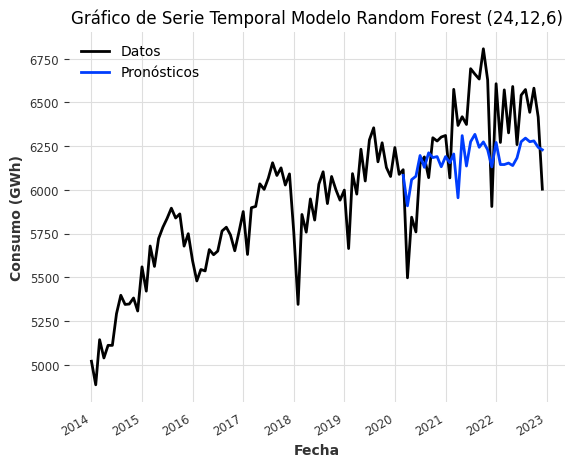

In [135]:
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones_e_normal_RF = serie_tiempo.inverse_transform(predictions)

serie_tiempo_original.plot(label='Datos')
predicciones_e_normal_RF.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Modelo Random Forest (24,12,6)')
plt.legend();

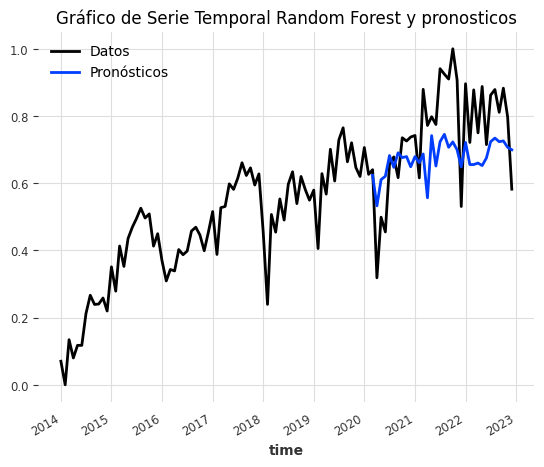

In [136]:
serie_tiempo_escalado.plot(label='Datos')
predictions.plot(label='Pronósticos')
plt.title('Gráfico de Serie Temporal Random Forest y pronosticos')
plt.legend();

In [137]:
mape = darts.metrics.mape(model_RF.predict(n=len(datos_test_escalado)),datos_test_escalado )
print("MAPE:", mape)

MAPE: 18.836327667775777


### Grid Search para optimizar parámetros de modelos RF

In [138]:
# Definir el diccionario de parámetros
param_grid = {
    'output_chunk_length': [12,24,36],
    'lags': [6,12,24],
    'n_estimators':[6,12,18,24]
}
# Crear un diccionario para almacenar los resultados
resultados = {}
# Iterar sobre todas las combinaciones de hiperparámetros
for output_chunk_length1, lags1, n_estimators1 in product(param_grid['output_chunk_length'],
                                                                    param_grid['lags'],
                                                                    param_grid['n_estimators']):

    model_RF_1 = RandomForest(lags=lags1,
                      lags_past_covariates=None,
                      lags_future_covariates=None,
                      output_chunk_length=output_chunk_length1,
                      add_encoders=None,
                      n_estimators=n_estimators1,
                      max_depth=None,
                      multi_models=False,
                      use_static_covariates=True,
                     verbose=True
                     )

  # Fit the model
    model_RF_1.fit(datos_entrenamiento_escalado)
  # Evaluar el modelo, guardar resultados
    mape_value = darts.metrics.mape(model_RF_1.predict(n=len(datos_test_escalado)),datos_test_escalado)

    # Almacenar los resultados en el diccionario
    resultados[(output_chunk_length1, lags1, n_estimators1)] = mape_value


# Suponiendo que 'resultados' es tu diccionario de resultados
df_resultados_RF= pd.DataFrame(list(resultados.items()), columns=['Hiperparámetros_RF', 'MAPE'])
df_resultados_RF = df_resultados_RF.sort_values(by='MAPE')
# Imprimir el DataFrame
print(df_resultados_RF)

   Hiperparámetros_RF       MAPE
22       (24, 24, 18)  17.453004
11       (12, 24, 24)  18.211451
16        (24, 12, 6)  18.304462
10       (12, 24, 18)  18.348647
17       (24, 12, 12)  18.820981
21       (24, 24, 12)  19.447365
32        (36, 24, 6)  19.607050
13        (24, 6, 12)  19.615615
9        (12, 24, 12)  19.625952
15        (24, 6, 24)  20.133045
8         (12, 24, 6)  20.148188
19       (24, 12, 24)  20.166745
12         (24, 6, 6)  20.376584
18       (24, 12, 18)  20.843290
14        (24, 6, 18)  21.074669
23       (24, 24, 24)  21.612844
20        (24, 24, 6)  22.015332
7        (12, 12, 24)  22.858898
4         (12, 12, 6)  23.582350
6        (12, 12, 18)  24.464945
5        (12, 12, 12)  26.651525
33       (36, 24, 12)  27.280714
35       (36, 24, 24)  27.790007
31       (36, 12, 24)  29.134235
1         (12, 6, 12)  29.712013
29       (36, 12, 12)  30.376077
0          (12, 6, 6)  30.985528
2         (12, 6, 18)  31.142046
30       (36, 12, 18)  31.574561
3         

## Selección del mejor modelo Random Forest

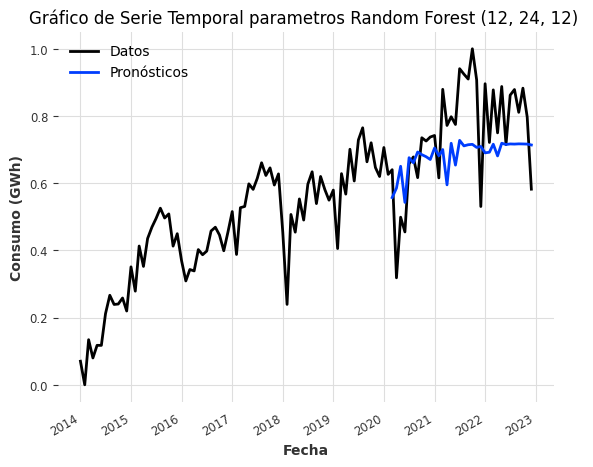

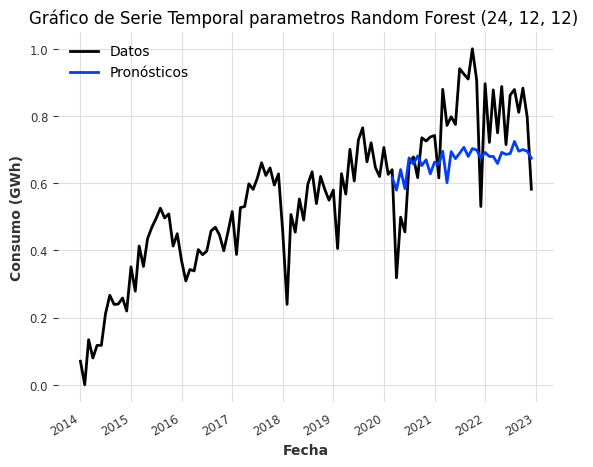

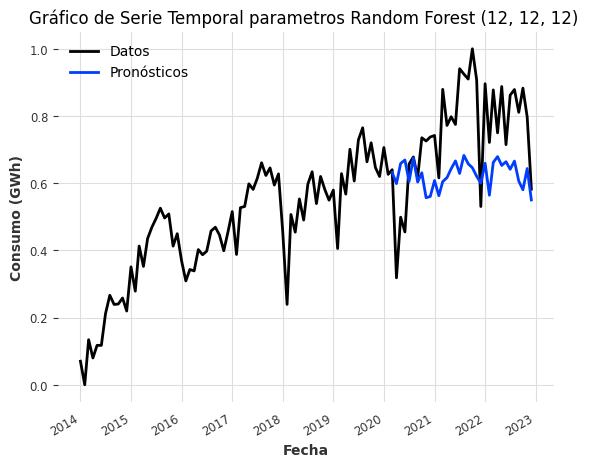

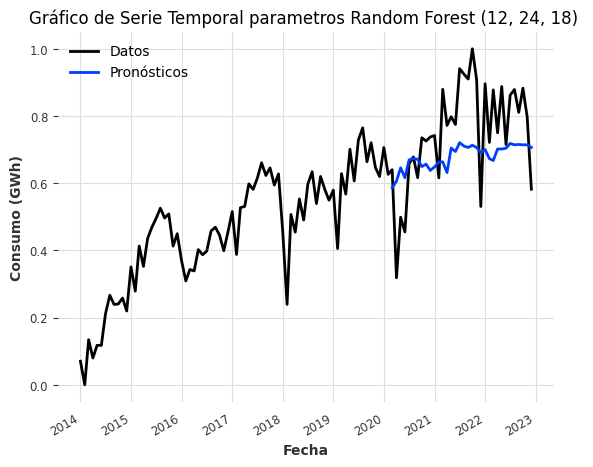

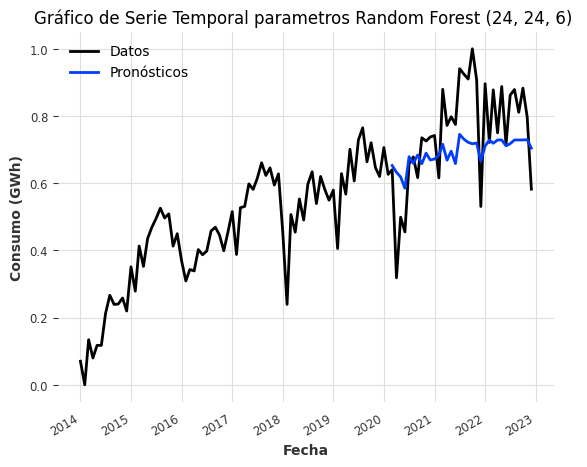

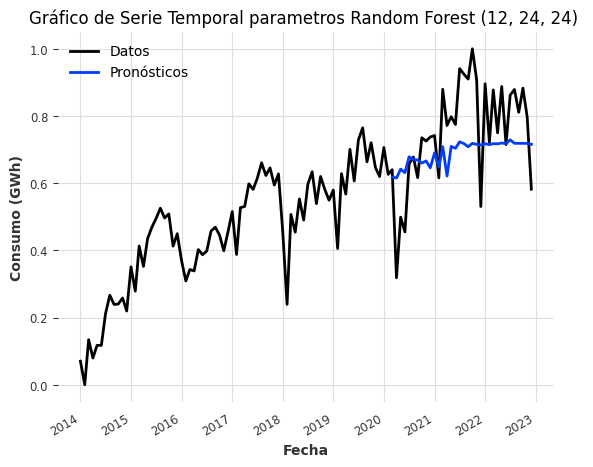

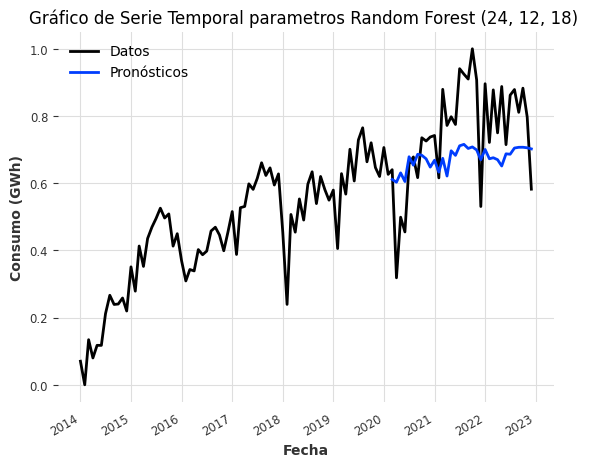

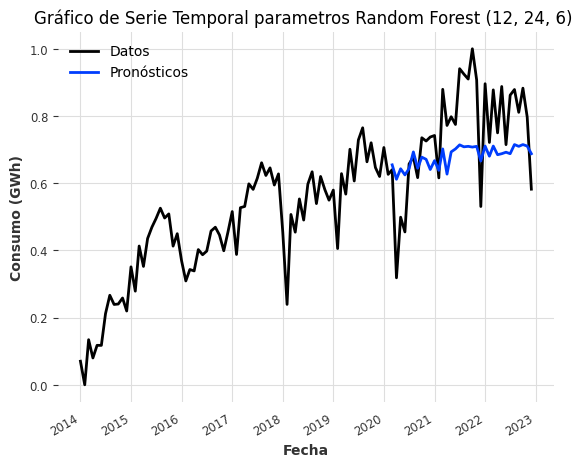

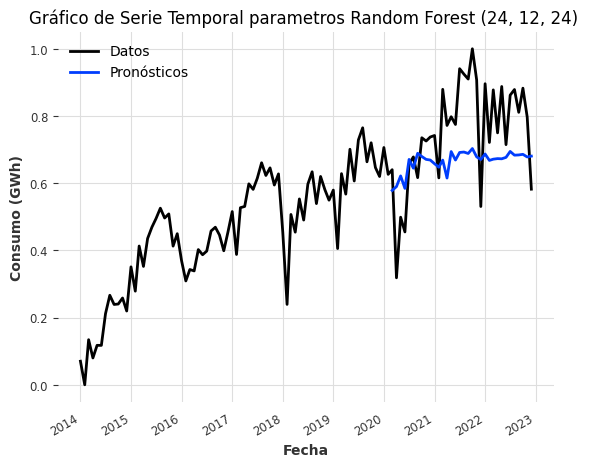

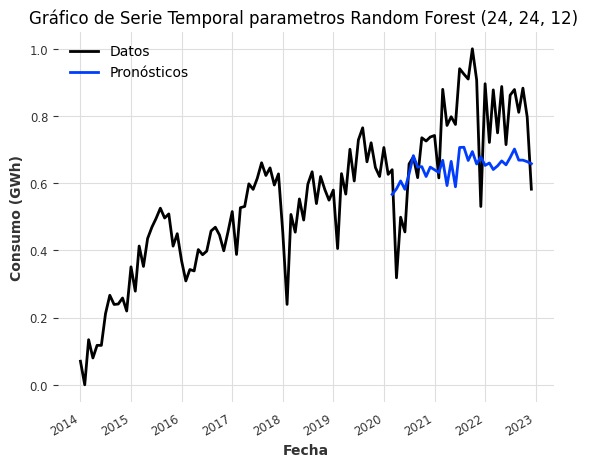

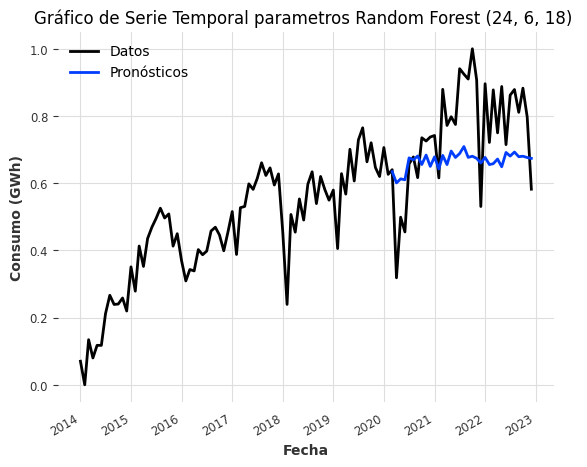

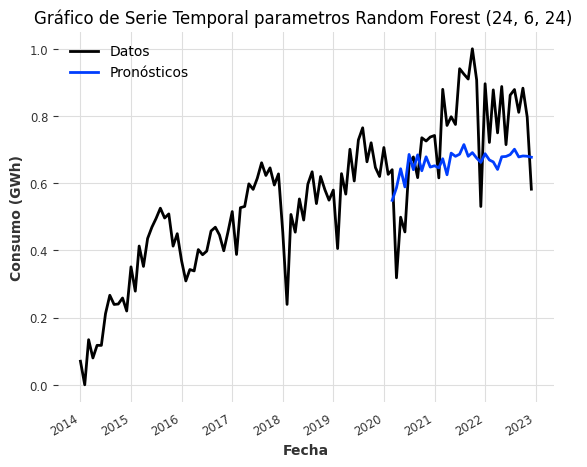

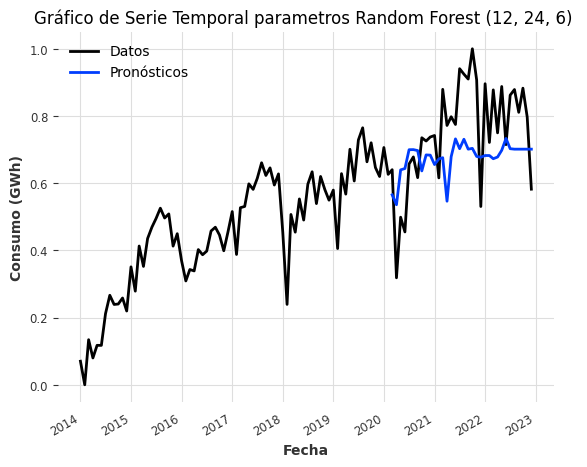

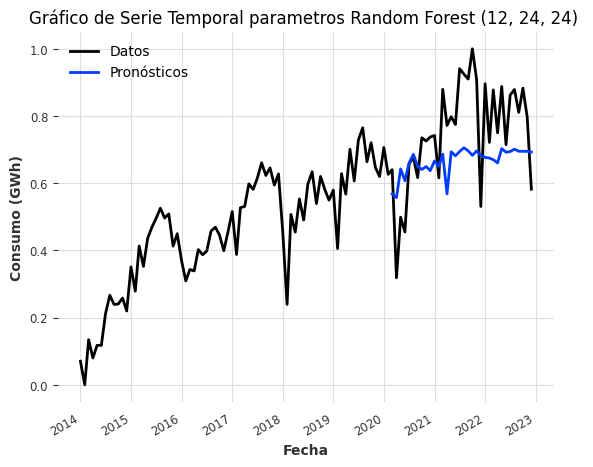

In [139]:
# Definir hiperparámetros
hiperparametros= [
      (12, 24, 12),
      (24, 12, 12),
      (12, 12, 12),
      (12, 24, 18),
      (24, 24, 6),
      (12, 24, 24),
      (24, 12, 18),
      (12, 24, 6),
      (24, 12, 24),
      (24, 24, 12),
      (24, 6, 18),
      (24, 6, 24),
      (12, 24, 6),
      (12, 24, 24),
]

# Iterar sobre todas las combinaciones de hiperparámetros
for hparams in hiperparametros:
  output_chunk_length1, lags1, n_estimators1 = hparams
  model_RF_1 = RandomForest(lags=lags1,
                      lags_past_covariates=None,
                      lags_future_covariates=None,
                      output_chunk_length=output_chunk_length1,
                      add_encoders=None,
                      n_estimators=n_estimators1,
                      max_depth=None,
                      multi_models=False,
                      use_static_covariates=True,
                      verbose=True
  )
  # Fit the model
  model_RF_1.fit(datos_entrenamiento_escalado)
  predictions = model_RF_1.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)
  serie_tiempo_escalado.plot(label='Datos')
  predictions.plot(label='Pronósticos')
  plt.xlabel('Fecha')
  plt.ylabel('Consumo (GWh)')
  plt.title(f'Gráfico de Serie Temporal parametros Random Forest {hparams} ')
  plt.legend();
  plt.show()

### Modelo seleccionado

In [140]:
model_RF = RandomForest(output_chunk_length=12,
                        lags=24,
                        n_estimators=24,
                        lags_past_covariates=None,
                        lags_future_covariates=None,
                        add_encoders=None,
                        max_depth=None,
                        multi_models=False,
                        use_static_covariates=True,
                        verbose=True
                     )

# Fit the model
model_RF.fit(datos_entrenamiento_escalado)

# Make predictions
predictions = model_RF.predict(n=len(datos_test_escalado), series=datos_entrenamiento_escalado)


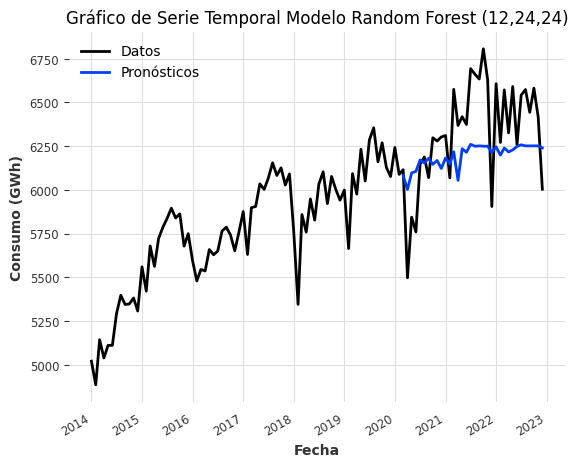

In [141]:
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones_e_normal_RF = serie_tiempo.inverse_transform(predictions)

serie_tiempo_original.plot(label='Datos')
predicciones_e_normal_RF.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Modelo Random Forest (12,24,24)')
plt.legend();

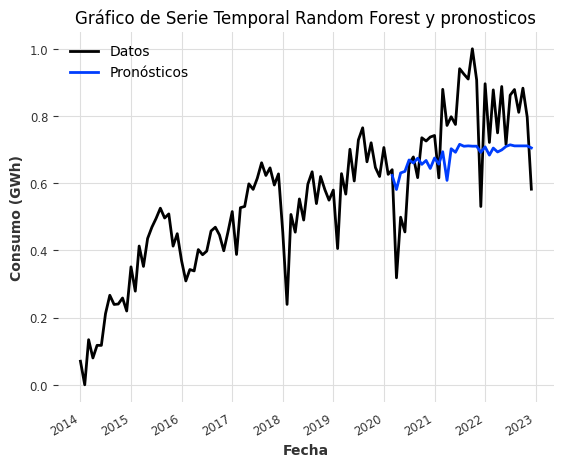

In [142]:
serie_tiempo_escalado.plot(label='Datos')
predictions.plot(label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Gráfico de Serie Temporal Random Forest y pronosticos')
plt.legend();

In [143]:
mape = darts.metrics.mape(model_RF.predict(n=len(datos_test_escalado)),datos_test_escalado )
print("MAPE:", mape)

MAPE: 18.440040215309956


# Aplicación de variables exógenas en los mejores modelos



## SARIMA y variables exógenas

In [144]:
# Define tus variables exógenas
variables_exogenas_entrenamiento = datos_entrenamiento[['Tasa de desempleo', 'Indice(IPC)','Inflacion']]
variables_exogenas_prueba = datos_prueba[[ 'Tasa de desempleo', 'Indice(IPC)','Inflacion']]

# Configuración del modelo SARIMAX
sarima_model = sm.tsa.SARIMAX(datos_entrenamiento['Consumo'],
                              exog=variables_exogenas_entrenamiento,
                              order=(0, 1, 0),
                              seasonal_order=(0, 1 , 1, 12))

# Ajuste del modelo
sarima_result = sarima_model.fit()

# Realiza pronósticos en el conjunto de prueba
predictions = sarima_result.get_forecast(steps=len(datos_prueba), exog=variables_exogenas_prueba)
#predictions = sarima_result.get_forecast(steps=len(datos_prueba))

# Obtiene los valores pronosticados y los intervalos de confianza
forecasted_values = predictions.predicted_mean

errores_absolutos = np.abs(forecasted_values - datos_prueba['Consumo'])

# Calcula el porcentaje de error absoluto para cada punto de datos
porcentajes_error_absoluto = (errores_absolutos / datos_prueba['Consumo']) * 100

# Calcula el MAPE como el promedio de los porcentajes de error absoluto
mape = np.mean(porcentajes_error_absoluto)

# Imprime el MAPE
print("MAPE:", mape)


MAPE: 3.2982296446585866


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


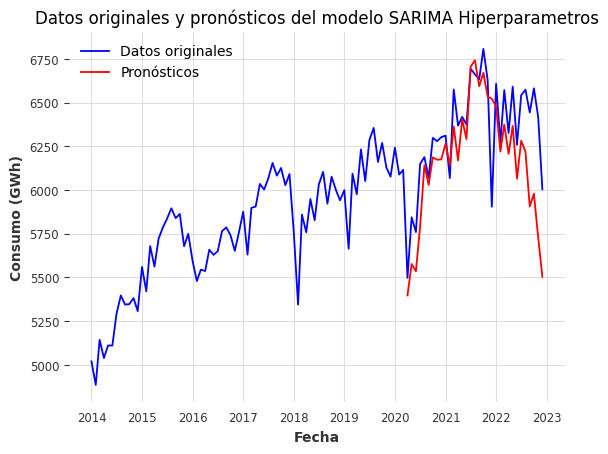

In [145]:
# Generar un rango de fechas para los pronósticos
fecha_inicial_pronostico = datos_entrenamiento.index[-1] + pd.DateOffset(months=1)
rango_fechas_pronostico = pd.date_range(start=fecha_inicial_pronostico, periods=len(datos_prueba), freq='M')

# Asignar el rango de fechas a los pronósticos
predictions.index = rango_fechas_pronostico

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(forecasted_values.index, forecasted_values, label='Pronósticos', color='red')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo SARIMA Hiperparametros')
plt.legend()
plt.show()

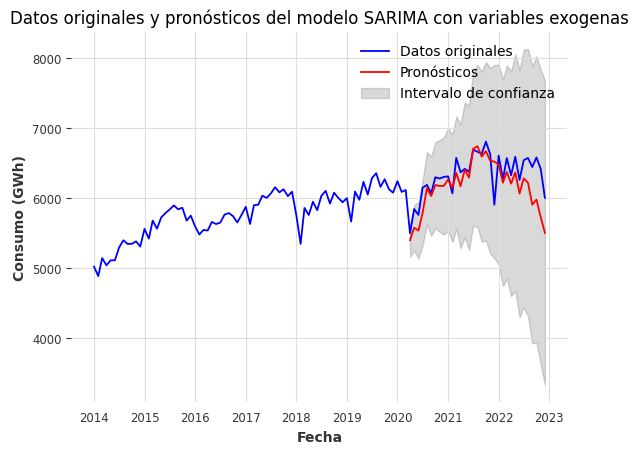

In [146]:
# Obtiene los intervalos de confianza para los pronósticos
intervalos_confianza = predictions.conf_int()

# Graficar los datos originales y los pronósticos en una misma gráfica
plt.plot(datos_Colombia.index, datos_Colombia['Consumo'], label='Datos originales', color='blue')
plt.plot(forecasted_values.index, forecasted_values, label='Pronósticos', color='red')

# Graficar los intervalos de confianza
plt.fill_between(intervalos_confianza.index,
                 intervalos_confianza.iloc[:, 0],
                 intervalos_confianza.iloc[:, 1],
                 color='k', alpha=.15, label='Intervalo de confianza')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.title('Datos originales y pronósticos del modelo SARIMA con variables exogenas')
plt.legend()
plt.show()


## N-BEATS y variables exógenas

In [147]:
# 'Población total', 'Población urbana', 'Población rural', 'Indice(IPC)', 'Tasa de desempleo', 'Inflacion'

datos_entrenamiento_darts = datos_Colombia['Consumo']
datos_entrenamiento_darts_exo = datos_Colombia[['Indice(IPC)']]

# Convertir la serie de pandas a un objeto TimeSeries de darts
datos_entrenamiento_darts = TimeSeries.from_series(datos_entrenamiento_darts)
datos_entrenamiento_darts_exo = TimeSeries.from_series(datos_entrenamiento_darts_exo)

serie_tiempo = Scaler()
serie_tiempo_escalado = serie_tiempo.fit_transform(datos_entrenamiento_darts)
serie_tiempo1 = Scaler()
serie_tiempo_escalado_exo = serie_tiempo1.fit_transform(datos_entrenamiento_darts_exo)

# Train And Validation Split
# Calcula el índice que separa los datos de entrenamiento y prueba
indice_separacion = int(len(serie_tiempo_escalado) * 0.7)

datos_entrenamiento_escalado, datos_test_escalado = serie_tiempo_escalado[:indice_separacion], serie_tiempo_escalado[indice_separacion:]
datos_entrenamiento_escalado_exo, datos_test_escalado_exo = serie_tiempo_escalado_exo[:indice_separacion], serie_tiempo_escalado_exo[indice_separacion:]

In [148]:
# Fusionar series temporales exógenas y endógenas
datos_entrenamiento_escalado_with_exo = datos_entrenamiento_escalado.stack(datos_entrenamiento_escalado_exo)

# Ajustar el modelo con las series temporales fusionadas
modelo = NBEATSModel(input_chunk_length=24, output_chunk_length=24, n_epochs=100, random_state=0)
modelo.fit(datos_entrenamiento_escalado_with_exo, verbose=True)

# Predecir con variable exógena
pred = modelo.predict(n=len(datos_test_escalado))
pred_consumo = pred.univariate_component('Consumo')


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
25.568    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [149]:
# Convertir 'pred' a un DataFrame de pandas
pred_df = pred.pd_dataframe()
datos_test_escalado_df=datos_test_escalado.pd_dataframe()

def calculate_mape(y_true, y_pred):
    return (abs(y_true - y_pred) / y_true).mean() * 100

# Calcular el MAPE entre las dos columnas
mape_value = calculate_mape(pred_df['Consumo'], datos_test_escalado_df['Consumo'])

print('MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: {:.2f}%'.format(mape_value))

MAPE entre "Consumo" en pred_df y "Consumo" en datos_test_escalado_df: 28.68%


In [150]:
pred_df = pred_df.drop('Indice(IPC)', axis=1)

In [151]:
# Calculamos el error de predicción para todas las filas
error = pred_df['Consumo'] - datos_test_escalado_df['Consumo']
# Renombrar la columna de error
error = error.rename('Error')

# Agregamos esta información al DataFrame original de predicciones
pred_df_con_intervalos = pd.concat([pred_df, error], axis=1)

# Nivel de confianza
confianza = 0.95
# Tamaño de la muestra
n = 33
# Valor crítico de Z para un nivel de confianza del 95%
z = stats.norm.ppf((1 + confianza) / 2)

# Calculamos los intervalos de confianza
pred_df_con_intervalos['IC_inferior'] = pred_df_con_intervalos['Consumo'] - z * (pred_df_con_intervalos['Error'] / np.sqrt(n))
pred_df_con_intervalos['IC_superior'] = pred_df_con_intervalos['Consumo'] + z * (pred_df_con_intervalos['Error'] / np.sqrt(n))

# Mostramos el DataFrame actualizado
pred_df_con_intervalos.head(5)

Consumo     Error  IC_inferior  IC_superior
time                                                    
2020-04-01  0.499890  0.181479     0.437972     0.561808
2020-05-01  0.782181  0.283367     0.685500     0.878862
2020-06-01  0.574866  0.119944     0.533943     0.615789
2020-07-01  0.617663 -0.039446     0.631121     0.604205
2020-08-01  0.593539 -0.084649     0.622420     0.564658

In [152]:
datos_entrenamient, datos_test = datos_entrenamiento_darts[:indice_separacion], datos_entrenamiento_darts[indice_separacion:]
predicciones__e_normal = serie_tiempo.inverse_transform(pred_consumo)

consumo_pronosticos= datos_test.pd_dataframe()
predicciones_escala_normal=predicciones__e_normal.pd_dataframe()

In [153]:
pred_df_con_intervalos['serie_tiempo_original'] =consumo_pronosticos
pred_df_con_intervalos['pronostico_original'] =predicciones_escala_normal

In [154]:
# Calcular el error restando las predicciones en escala normal del pronóstico
error = pred_df_con_intervalos['pronostico_original'] - pred_df_con_intervalos['serie_tiempo_original']
# Renombrar la columna de error
error_n = error.rename('Error_N')
# Mostrar el resultado
print(error_n)

time
2020-04-01    348.792700
2020-05-01    544.618093
2020-06-01    230.526370
2020-07-01    -75.813063
2020-08-01   -162.691687
2020-09-01    -77.836752
2020-10-01   -189.107593
2020-11-01   -311.335340
2020-12-01   -356.326113
2021-01-01   -489.436645
2021-02-01    410.345956
2021-03-01   -531.475635
2021-04-01   -288.036836
2021-05-01   -329.102078
2021-06-01   -357.479564
2021-07-01   -531.066670
2021-08-01   -627.150183
2021-09-01   -655.363023
2021-10-01   -703.876844
2021-11-01   -769.940849
2021-12-01     17.242330
2022-01-01   -552.025332
2022-02-01   -179.193876
2022-03-01   -523.038574
2022-04-01   -165.923919
2022-05-01   -208.703327
2022-06-01     -6.300505
2022-07-01    -99.055614
2022-08-01   -454.787817
2022-09-01   -322.902004
2022-10-01   -256.756414
2022-11-01    -67.988025
2022-12-01    281.022090
Freq: MS, Name: Error_N, dtype: float64


In [155]:
pred_df_con_intervalos= pd.concat([pred_df_con_intervalos, error_n], axis=1)

In [156]:
pred_df_con_intervalos.head(5)

Consumo     Error  IC_inferior  IC_superior  \
time                                                       
2020-04-01  0.499890  0.181479     0.437972     0.561808   
2020-05-01  0.782181  0.283367     0.685500     0.878862   
2020-06-01  0.574866  0.119944     0.533943     0.615789   
2020-07-01  0.617663 -0.039446     0.631121     0.604205   
2020-08-01  0.593539 -0.084649     0.622420     0.564658   

            serie_tiempo_original  pronostico_original     Error_N  
time                                                                
2020-04-01              5496.8907          5845.683400  348.792700  
2020-05-01              5843.6141          6388.232193  544.618093  
2020-06-01              5759.2574          5989.783770  230.526370  
2020-07-01              6147.8508          6072.037737  -75.813063  
2020-08-01              6188.3646          6025.672913 -162.691687

In [157]:
pred_df_con_intervalos['IC_inferior_N'] = pred_df_con_intervalos['pronostico_original'] - z * (pred_df_con_intervalos['Error_N'] / np.sqrt(n))
pred_df_con_intervalos['IC_superior_N'] = pred_df_con_intervalos['pronostico_original'] + z * (pred_df_con_intervalos['Error_N'] / np.sqrt(n))



In [158]:
pred_df_con_intervalos.tail(5)

Consumo     Error  IC_inferior  IC_superior  \
time                                                       
2022-08-01  0.642143 -0.236628     0.722877     0.561408   
2022-09-01  0.642912 -0.168007     0.700234     0.585590   
2022-10-01  0.749193 -0.133592     0.794772     0.703613   
2022-11-01  0.761368 -0.035374     0.773437     0.749298   
2022-12-01  0.728412  0.146217     0.678525     0.778299   

            serie_tiempo_original  pronostico_original     Error_N  \
time                                                                 
2022-08-01              6573.8738          6119.085983 -454.787817   
2022-09-01              6443.4663          6120.564296 -322.902004   
2022-10-01              6581.5879          6324.831486 -256.756414   
2022-11-01              6416.2185          6348.230475  -67.988025   
2022-12-01              6003.8697          6284.891790  281.022090   

            IC_inferior_N  IC_superior_N  
time                                      
2022-08-01    6274.253190    5963.918775  
2022-09-01    6230.733919    6010.394674  
2022-10-01    6412.433163    6237.229808  
2022-11-01    6371.427033    6325.033918  
2022-12-01    6189.011005    6380.772574

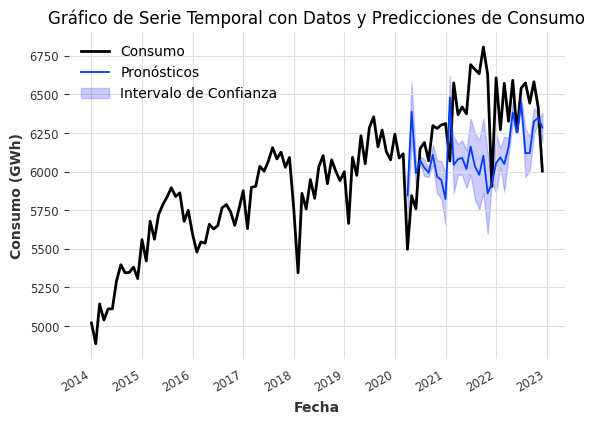

In [159]:
# Revertir la escala para obtener los valores originales
serie_tiempo_original = serie_tiempo.inverse_transform(serie_tiempo_escalado)
predicciones__e_normal = serie_tiempo.inverse_transform(pred_consumo)

serie_tiempo_original.plot(label='Consumo')
pred_df_con_intervalos['pronostico_original'].plot(label='Pronósticos')

# Agregar los intervalos de confianza
plt.fill_between(pred_df_con_intervalos.index, pred_df_con_intervalos['IC_inferior_N'], pred_df_con_intervalos['IC_superior_N'], color='blue', alpha=0.2, label='Intervalo de Confianza')

plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
# Agregar título y leyenda
plt.title('Gráfico de Serie Temporal con Datos y Predicciones de Consumo')
plt.legend()
plt.show()
